# Final Project: BD523 - Big Data Exploration and Preparation for Analytics
## Machine Learning Regression
---
```bash
Author: Witchakorn Wanasanwongkot
StudentID: 65130459
College of Innovative Technology and Engineering, Dhurakij Pundit University
```

## Car Price Prediction
*URL = https://www.kaggle.com/datasets/CooperUnion/cardataset*

![](https://plus.unsplash.com/premium_photo-1678318784591-cb64d92e14cb?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1170&q=80)

*Image source: [Unsplash](https://unsplash.com/photos/XophTudsBUw)*

### Introduction
**Context:**
- This project aims to demonstrate the significance of car price prediction in facilitating better `decision-making` and `market analysis` for both buyers and sellers. For buyers, car price prediction allows for informed decision-making, effective price negotiation, and the ability to assess fair market value. Sellers, on the other hand, can benefit from guidance in setting reasonable asking prices, attracting potential buyers, and expediting the selling process.

**Content:**
- Cars dataset with features including *make*, *model*, *year*, *engine*, and other properties of the car used to predict its *price* or *MSRP, the manufacturer's suggested retail price.*

**Machine Learning Algorithm:**
- Linear Regression
- Random Forrest for Regression
- Gradient Boosting for Regression

In [1]:
import pandas as pd
import numpy as np
import copy

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data Preparation
Load and preprocess the data, handle missing values, and perform feature engineering if necessary.

In [14]:
# Verify the total number of rows in the dataset.
df = pd.read_csv('data.csv')
len(df)

11914

In [15]:
# Check if the header names in the dataset are consistent.
df.head(3)

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350

In [16]:
# Normalize the headers of the dataset by renaming them with snake case.
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('engine_', '')
print(df.columns)

Index(['make', 'model', 'year', 'fuel_type', 'hp', 'cylinders',
       'transmission_type', 'driven_wheels', 'number_of_doors',
       'market_category', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp'],
      dtype='object')


In [17]:
df.head(3)

make       model  year                    fuel_type     hp  cylinders  \
0  BMW  1 Series M  2011  premium unleaded (required)  335.0        6.0   
1  BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
2  BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   

  transmission_type     driven_wheels  number_of_doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   
2            MANUAL  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350

### Overview of Data Variable Types
Common data types include numerical and categorical, although each may be further subdivided such as integer and floating point for numerical variables, and boolean, ordinal, or nominal for categorical variables.

![ddd](https://machinelearningmastery.com/wp-content/uploads/2020/06/Overview-of-Data-Variable-Types2.png)

*Image source: [Machine Learning Mastery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)*

- **Numerical Output**: Regression predictive modeling problem.
- **Categorical Output**: Classification predictive modeling problem.

### Missing Values

In [18]:
# Verify the presence of null values in each column.
df.isnull().sum()

make                    0
model                   0
year                    0
fuel_type               3
hp                     69
cylinders              30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [15]:
df.isnull().sum()[df.isnull().sum() > 0]

fuel_type             3
hp                   69
cylinders            30
number_of_doors       6
market_category    3742
dtype: int64

In [16]:
round(df.isnull().sum()[df.isnull().sum() > 0]/len(df), 4)

fuel_type          0.0003
hp                 0.0058
cylinders          0.0025
number_of_doors    0.0005
market_category    0.3141
dtype: float64

In [17]:
# Examine the unique values in each column that contains null values.
null_col = df.columns[df.isnull().any()].tolist()

for col in null_col:
    print(f"{col}: ({df[col].nunique()}) -> {df[col].dtypes} ")
    print(df[col].unique()[:10])
    print("-"*70)

fuel_type: (10) -> object 
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'electric' 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (premium unleaded required/E85)'
 'flex-fuel (unleaded/natural gas)']
----------------------------------------------------------------------
hp: (356) -> float64 
[335. 300. 230. 320. 172. 160. 130. 158. 240. 248.]
----------------------------------------------------------------------
cylinders: (9) -> float64 
[ 6.  4.  5.  8. 12.  0. nan 10.  3. 16.]
----------------------------------------------------------------------
number_of_doors: (3) -> float64 
[ 2.  4.  3. nan]
----------------------------------------------------------------------
market_category: (71) -> object 
['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance' 'Flex Fuel'
 'Flex Fuel,Performance' nan 'Hatchback' 'Hatchback,Luxury,Perf

#### fuel_type

In [19]:
# Since `fuel_type` is a categorical variable, fill in the null values with the mode (most frequent value) of the column.
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])

#### hp & cylinders

In [20]:
df.loc[(df['hp'].isnull()) | (df['cylinders'].isnull())].groupby('fuel_type')['fuel_type'].count()

fuel_type
diesel                               1
electric                            53
flex-fuel (unleaded/natural gas)     6
premium unleaded (recommended)       4
premium unleaded (required)         17
regular unleaded                    17
Name: fuel_type, dtype: int64

In [21]:
# Replace null values in the `hp` and `cylinders` columns with 0, as some of the cars with null values may be electric vehicles that do not have cylinders or housepower.
df['hp'] = df['hp'].fillna(0)
df['cylinders'] = df['cylinders'].fillna(0)

#### number_of_doors

In [22]:
df['number_of_doors'].unique().tolist()

[2.0, 4.0, 3.0, nan]

In [23]:
df.loc[(df['number_of_doors'].isnull())]

make    model  year                    fuel_type     hp  cylinders  \
4666  Ferrari       FF  2013  premium unleaded (required)  651.0       12.0   
6930    Tesla  Model S  2016                     electric    0.0        0.0   
6931    Tesla  Model S  2016                     electric    0.0        0.0   
6932    Tesla  Model S  2016                     electric    0.0        0.0   
6933    Tesla  Model S  2016                     electric    0.0        0.0   
6934    Tesla  Model S  2016                     electric    0.0        0.0   

     transmission_type     driven_wheels  number_of_doors  \
4666  AUTOMATED_MANUAL   all wheel drive              NaN   
6930      DIRECT_DRIVE   all wheel drive              NaN   
6931      DIRECT_DRIVE   all wheel drive              NaN   
6932      DIRECT_DRIVE   all wheel drive              NaN   
6933      DIRECT_DRIVE  rear wheel drive              NaN   
6934      DIRECT_DRIVE   all wheel drive              NaN   

              market_category vehicle_size vehicle_style  highway_mpg  \
4666  Exotic,High-Performance        Large         Coupe           16   
6930       Exotic,Performance        Large         Sedan          105   
6931       Exotic,Performance        Large         Sedan          101   
6932  Exotic,High-Performance        Large         Sedan          105   
6933       Exotic,Performance        Large         Sedan          100   
6934       Exotic,Performance        Large         Sedan          107   

      city_mpg  popularity    msrp  
4666        11        2774  295000  
6930       102        1391   79500  
6931        98        1391   66000  
6932        92        1391  134500  
6933        97        1391   74500  
6934       101        1391   71000

In [24]:
# For the `number_of_doors` column, fill in the null values with 2 for cars with the body type "Coupe" and 4 for cars with the body type "Sedan".
df.loc[(df['number_of_doors'].isnull()) & (df['vehicle_style'] == 'Coupe'), 'number_of_doors'] = \
    df.loc[(df['number_of_doors'].isnull()) & (df['vehicle_style'] == 'Coupe'), 'number_of_doors'].fillna(2)
df.loc[(df['number_of_doors'].isnull()) & (df['vehicle_style'] == 'Sedan'), 'number_of_doors'] = \
    df.loc[(df['number_of_doors'].isnull()) & (df['vehicle_style'] == 'Sedan'), 'number_of_doors'].fillna(4)

#### market_category

In [25]:
# Let's drop the `market_category` column since it contains too many null values, and this feature is not highly important for the target feature, which is price.
df.drop('market_category', axis=1, inplace=True)

In [26]:
df.isnull().sum()

make                 0
model                0
year                 0
fuel_type            0
hp                   0
cylinders            0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

### Anomalies

In [27]:
# Search for anomalies in each column in a Dataframe to verify the data quality.
for col in df.columns[:-1]:
    print(f"{col}: ({df[col].nunique()}) -> {df[col].dtypes} ")
    print(df[col].unique())
    print("-"*70)

make: (48) -> object 
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
----------------------------------------------------------------------
model: (915) -> object 
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Clas

In [28]:
df['transmission_type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

In [29]:
df['transmission_type'].value_counts(normalize=True)

AUTOMATIC           0.693806
MANUAL              0.246349
AUTOMATED_MANUAL    0.052543
DIRECT_DRIVE        0.005708
UNKNOWN             0.001595
Name: transmission_type, dtype: float64

In [30]:
# The `transmission_type` column contains the value 'UNKNOWN', which is an anomaly that should be dropped from the dataset.
df.drop(df[df['transmission_type']=='UNKNOWN'].index, axis=0, inplace=True)

In [31]:
# Determine the data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11895 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11895 non-null  object 
 1   model              11895 non-null  object 
 2   year               11895 non-null  int64  
 3   fuel_type          11895 non-null  object 
 4   hp                 11895 non-null  float64
 5   cylinders          11895 non-null  float64
 6   transmission_type  11895 non-null  object 
 7   driven_wheels      11895 non-null  object 
 8   number_of_doors    11895 non-null  float64
 9   vehicle_size       11895 non-null  object 
 10  vehicle_style      11895 non-null  object 
 11  highway_mpg        11895 non-null  int64  
 12  city_mpg           11895 non-null  int64  
 13  popularity         11895 non-null  int64  
 14  msrp               11895 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.5+ MB


In [32]:
# Change the data type of the column `hp`, `cylinders` and `number_of_doors` properly.
df['hp'] = df['hp'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['number_of_doors'] = df['number_of_doors'].astype(int)
df['vehicle_size'].replace({'Compact': 1, 'Midsize': 2, 'Large': 3}, inplace=True)

In [33]:
df.dtypes

make                 object
model                object
year                  int64
fuel_type            object
hp                    int32
cylinders             int32
transmission_type    object
driven_wheels        object
number_of_doors       int32
vehicle_size          int64
vehicle_style        object
highway_mpg           int64
city_mpg              int64
popularity            int64
msrp                  int64
dtype: object

### Outliers

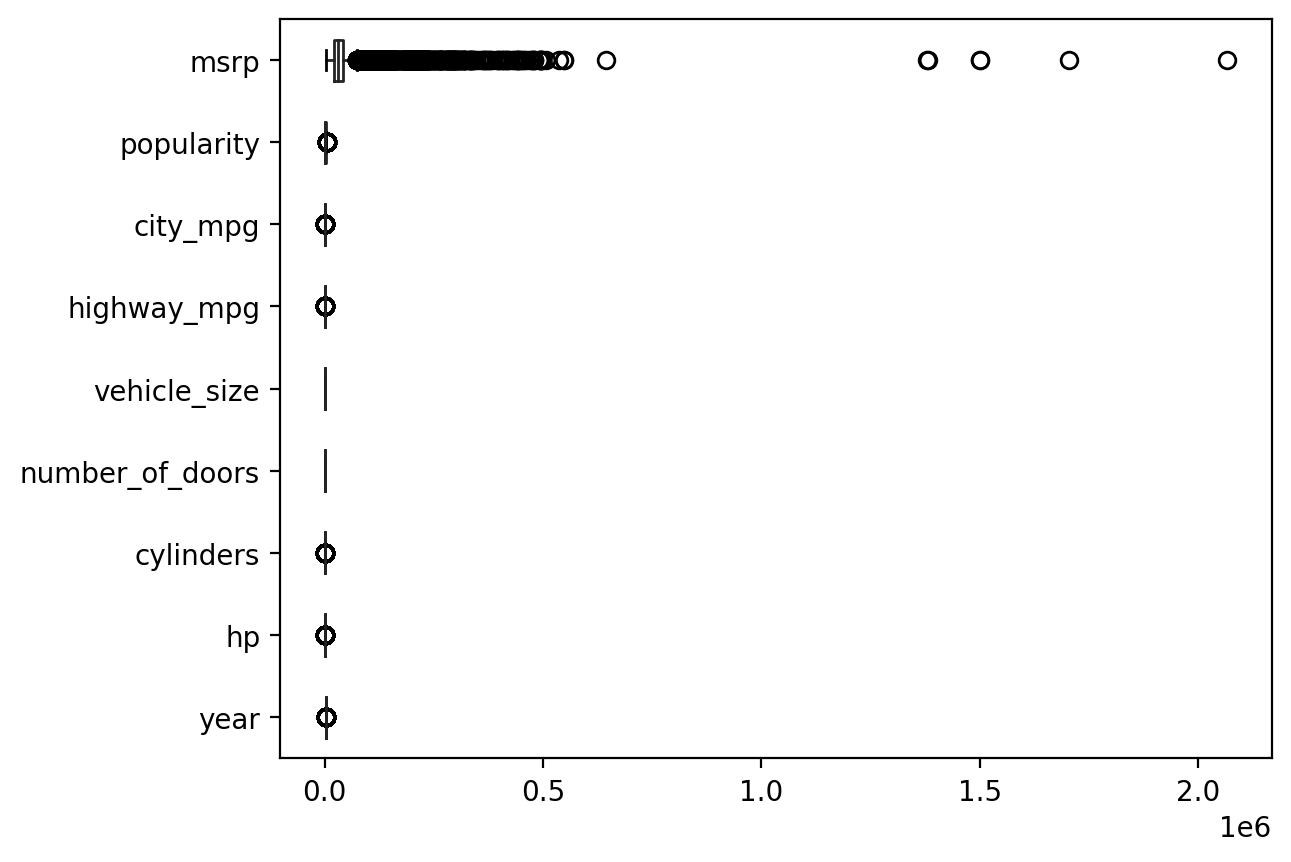

In [34]:
sns.set_palette("gray")
df.boxplot(vert=False, grid=False);

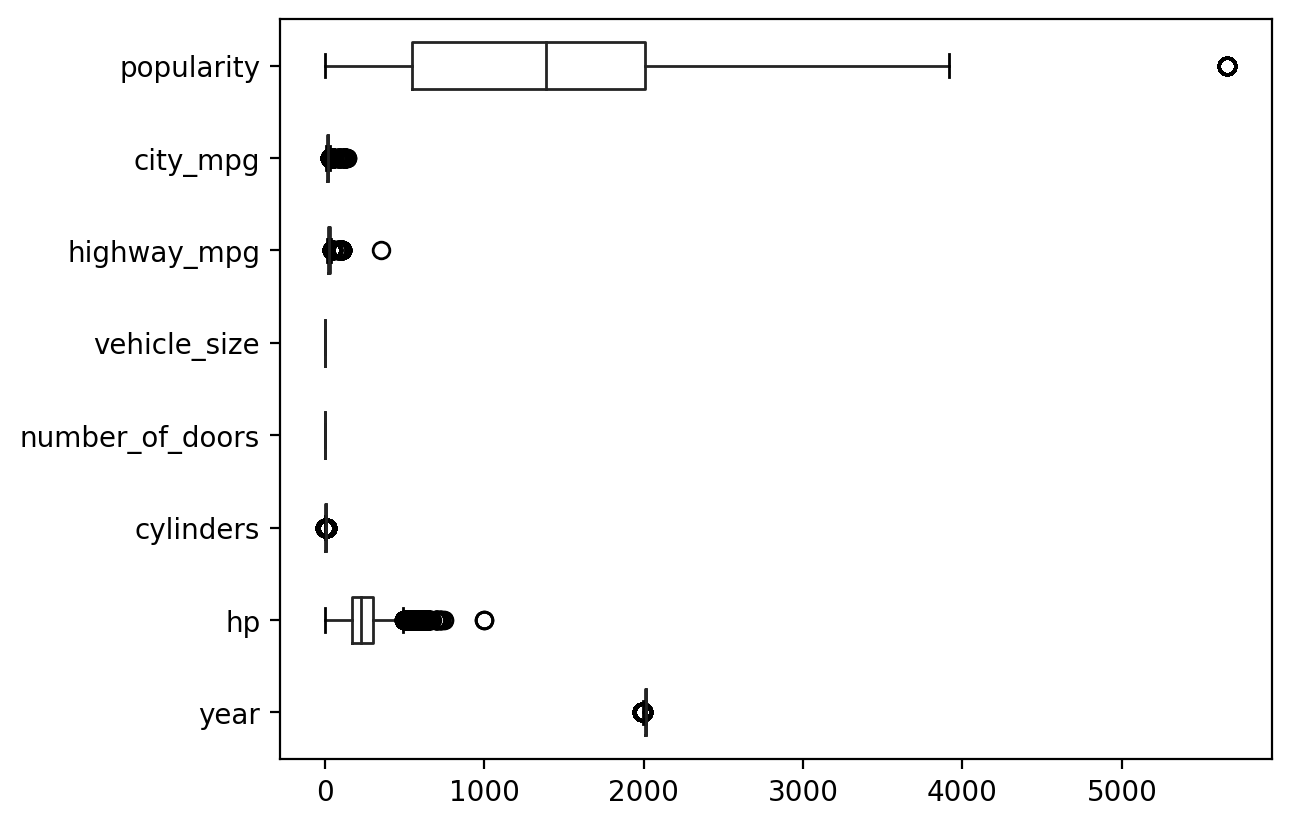

In [35]:
df.drop('msrp', axis=1).boxplot(vert=False, grid=False);

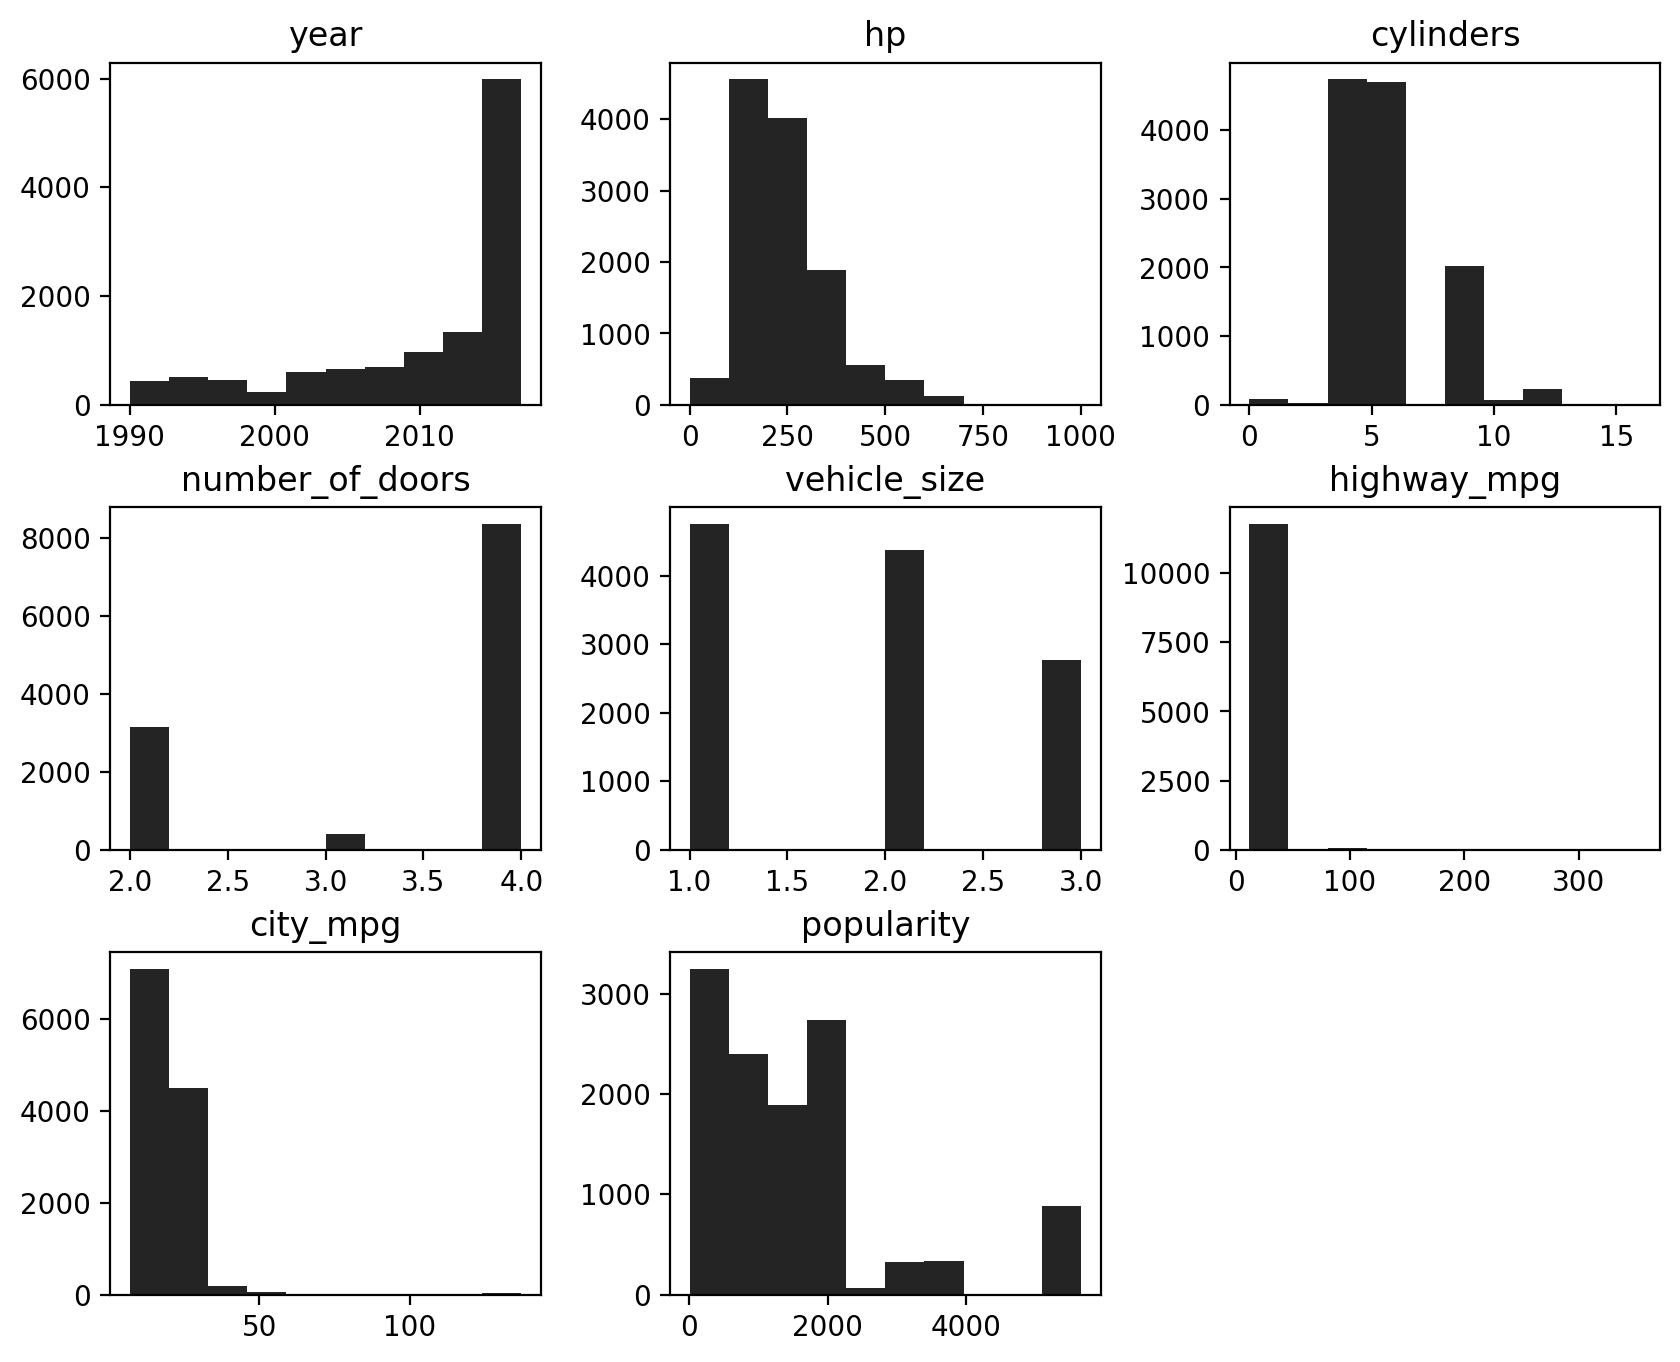

In [36]:
df.drop('msrp', axis=1).hist(figsize=(10, 8), grid=False);

In [37]:
# Apply Interquartile Range method for non-Gaussian distribution sample of data.
s1 = df.shape
outliers_df = df[['hp', 'cylinders', 'highway_mpg', 'city_mpg', 'popularity']]

for c in outliers_df.columns:
    q1 = df[c].quantile(0.25) # np.percentile(df[c], 25)
    q3 = df[c].quantile(0.75) # np.percentile(df[c], 75)

    iqr =  q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)

    lower_idx = df[df[c] < lower_bound].index
    upper_idx = df[df[c] > upper_bound].index

    df.drop(lower_idx, inplace=True)
    df.drop(upper_idx, inplace=True)

s2 = df.shape
outliers = s1[0] - s2[0]
print("Deleted outliers:", outliers)
print("Non-outlier observations:", s2[0])

Deleted outliers: 1750
Non-outlier observations: 10145


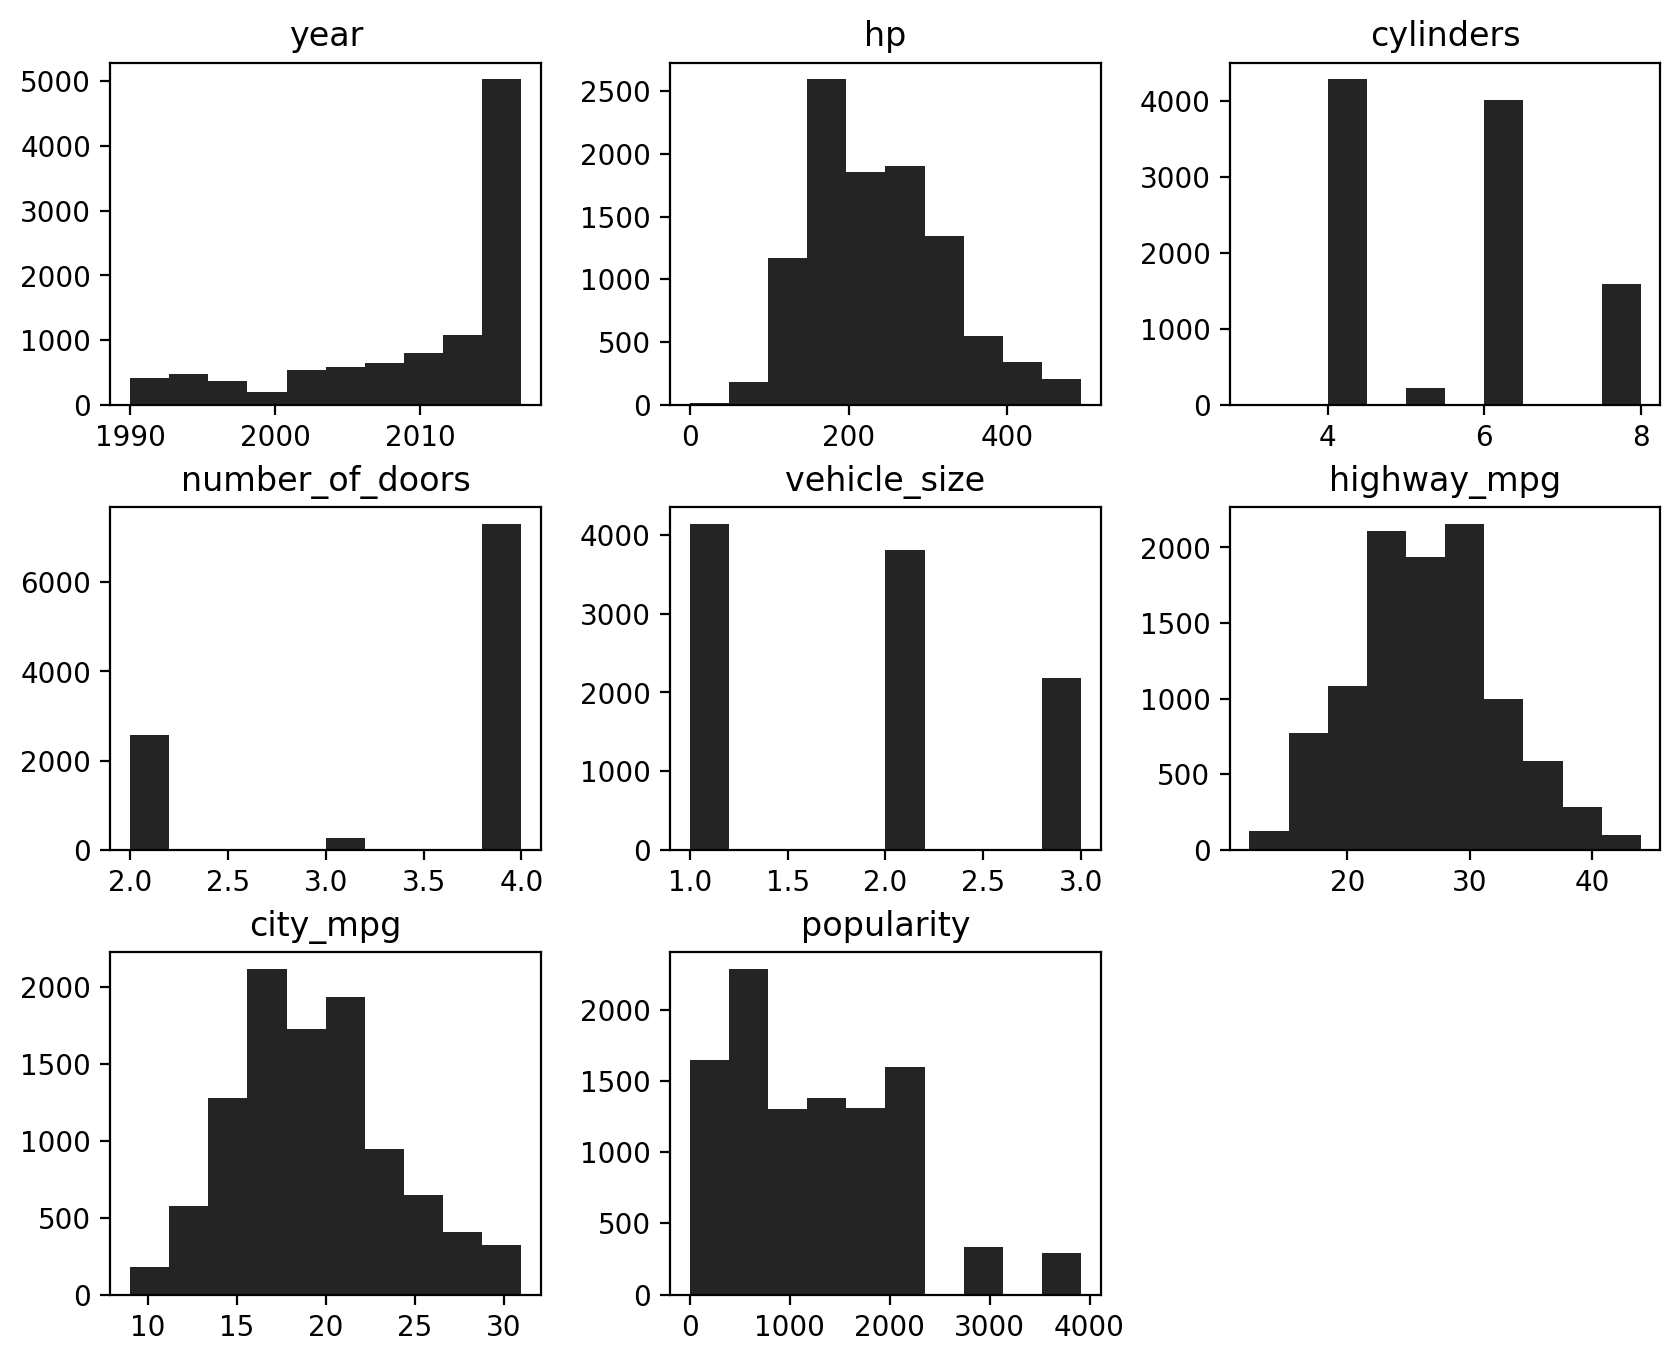

In [38]:
df.drop('msrp', axis=1).hist(figsize=(10, 8), grid=False);

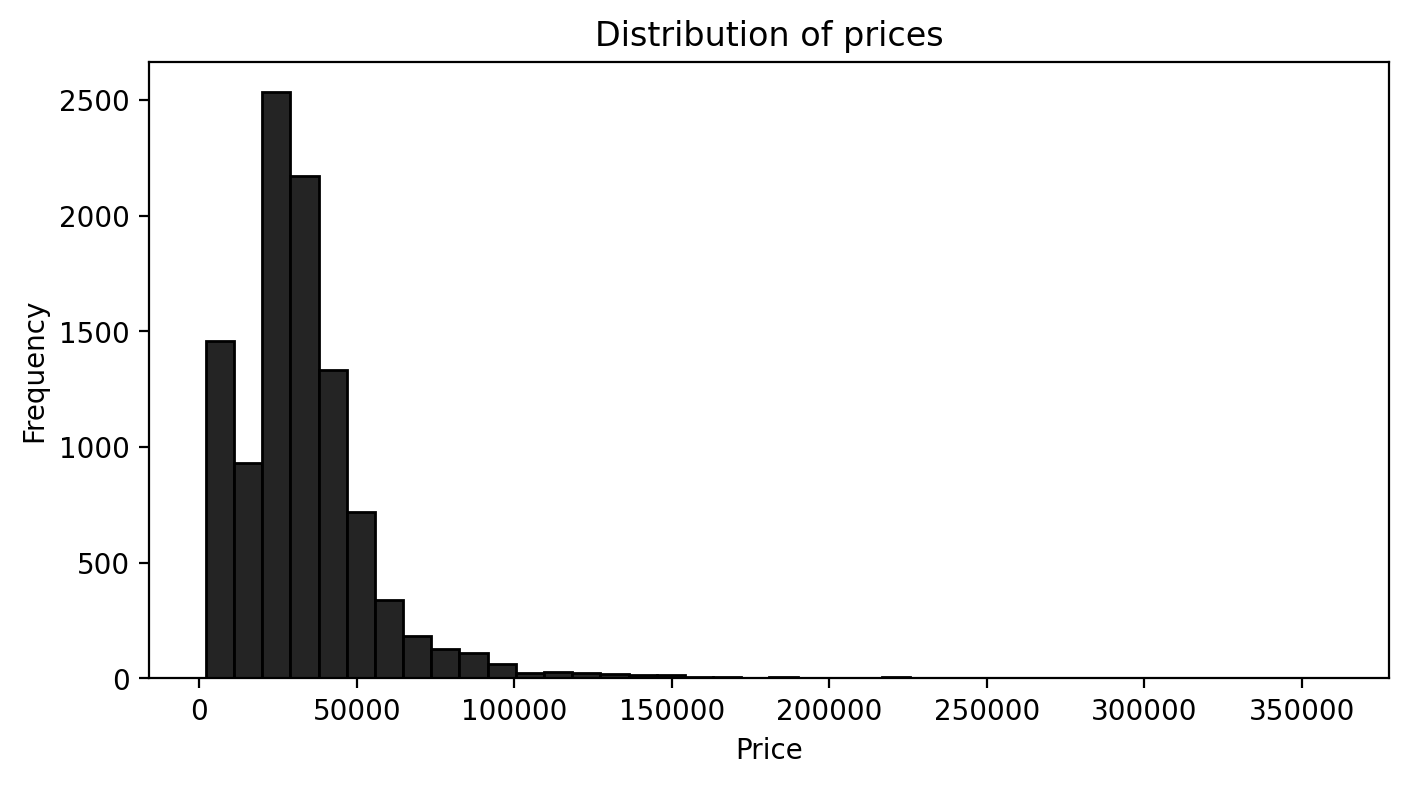

In [39]:
# Observe that the target variable exhibits a highly skewed distribution.
plt.figure(figsize=(8, 4))
sns.set_palette("gray")

sns.histplot(df.msrp, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

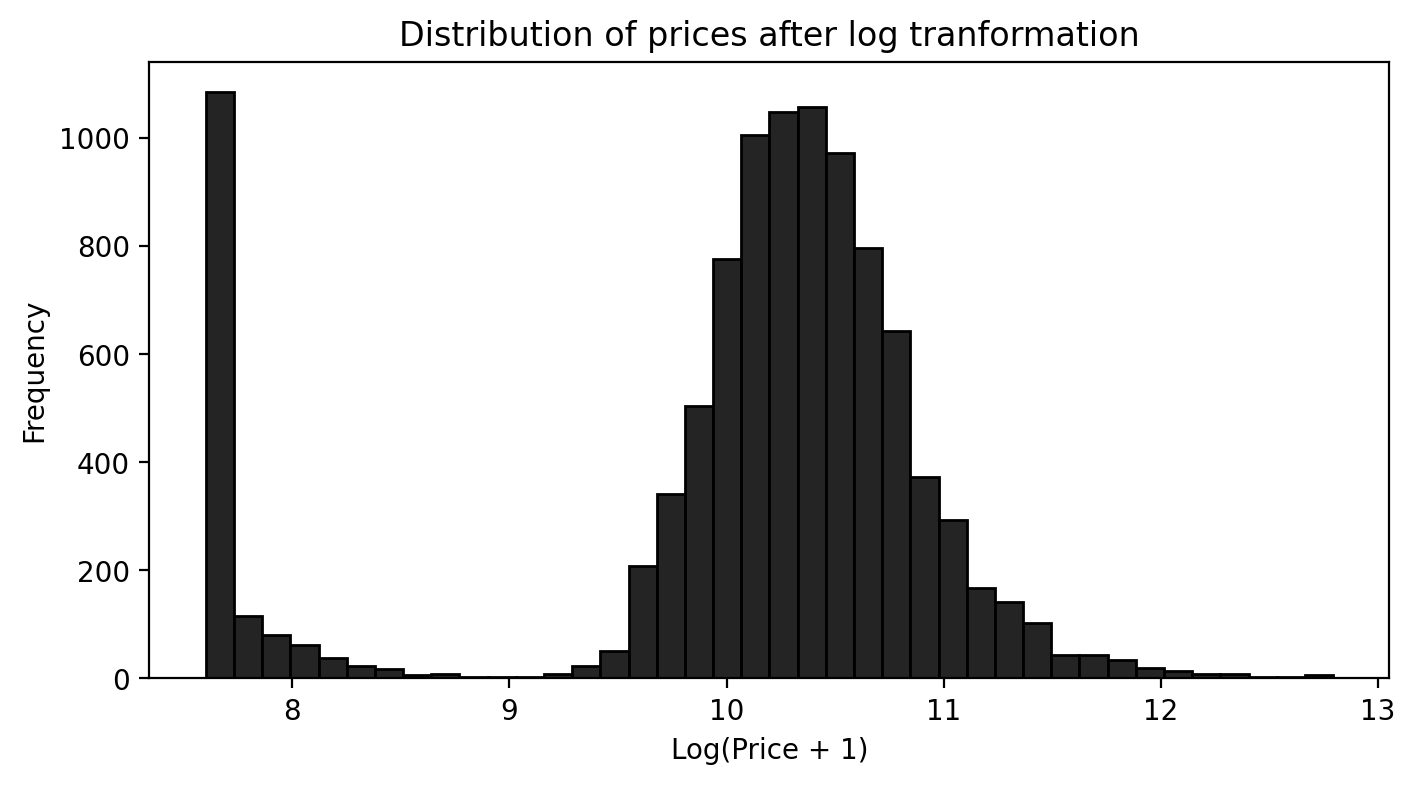

In [40]:
# To handle the long-tailed distribution of the data, apply a logarithmic scale transformation.
plt.figure(figsize=(8, 4))

log_price = np.log1p(df.msrp)
sns.histplot(log_price, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')
plt.show()

In [42]:
for col in categorical_features:
    print(f"{col}: ({df[col].nunique()}) -> {df[col].dtypes} ")
    print(df[col].unique())
    print("-"*70)

fuel_type: (9) -> object 
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (unleaded/natural gas)'
 'flex-fuel (premium unleaded required/E85)']
----------------------------------------------------------------------
model: (744) -> object 
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '4C' '4Runner'
 '5 Series Gran Turismo' '5 Series' '500-Class' '500' '500L' '500X'
 '560-Class' '5' '6 Series Gran Coupe' '6 Series' '6000' '626' '6'
 '7 Series' '718 Cayman' '740' '760' '780' '8 Series' '80' '850' '86'
 '9-2X' '9-3 Griffin' '9-3' '9-4X' '9-5' '9-7X' '9000' '900' '90' '911'
 '928' '929' '940' '944' '960' '968' 'A3' 'A4

In [ ]:
print("Target feature:")
target_variable = ['msrp']
print(target_variable)
print("-"*100)

print("Numeric features:")
numeric_features = list(set(df.describe().columns) - set(target_variable))
print(numeric_features)
print("-"*100)

print("Categorical features:")
categorical_features = list(set(df.columns) - set(df.describe().columns))
print(categorical_features)

Target feature:
['msrp']
----------------------------------------------------------------------------------------------------
Numeric features:
['city_mpg', 'year', 'popularity', 'number_of_doors', 'vehicle_size', 'cylinders', 'hp', 'highway_mpg']
----------------------------------------------------------------------------------------------------
Categorical features:
['fuel_type', 'model', 'make', 'transmission_type', 'vehicle_style', 'driven_wheels']


## Data Exploration
Explore the data through descriptive statistics, visualizations, and correlation analysis.

### Univariate Analysis

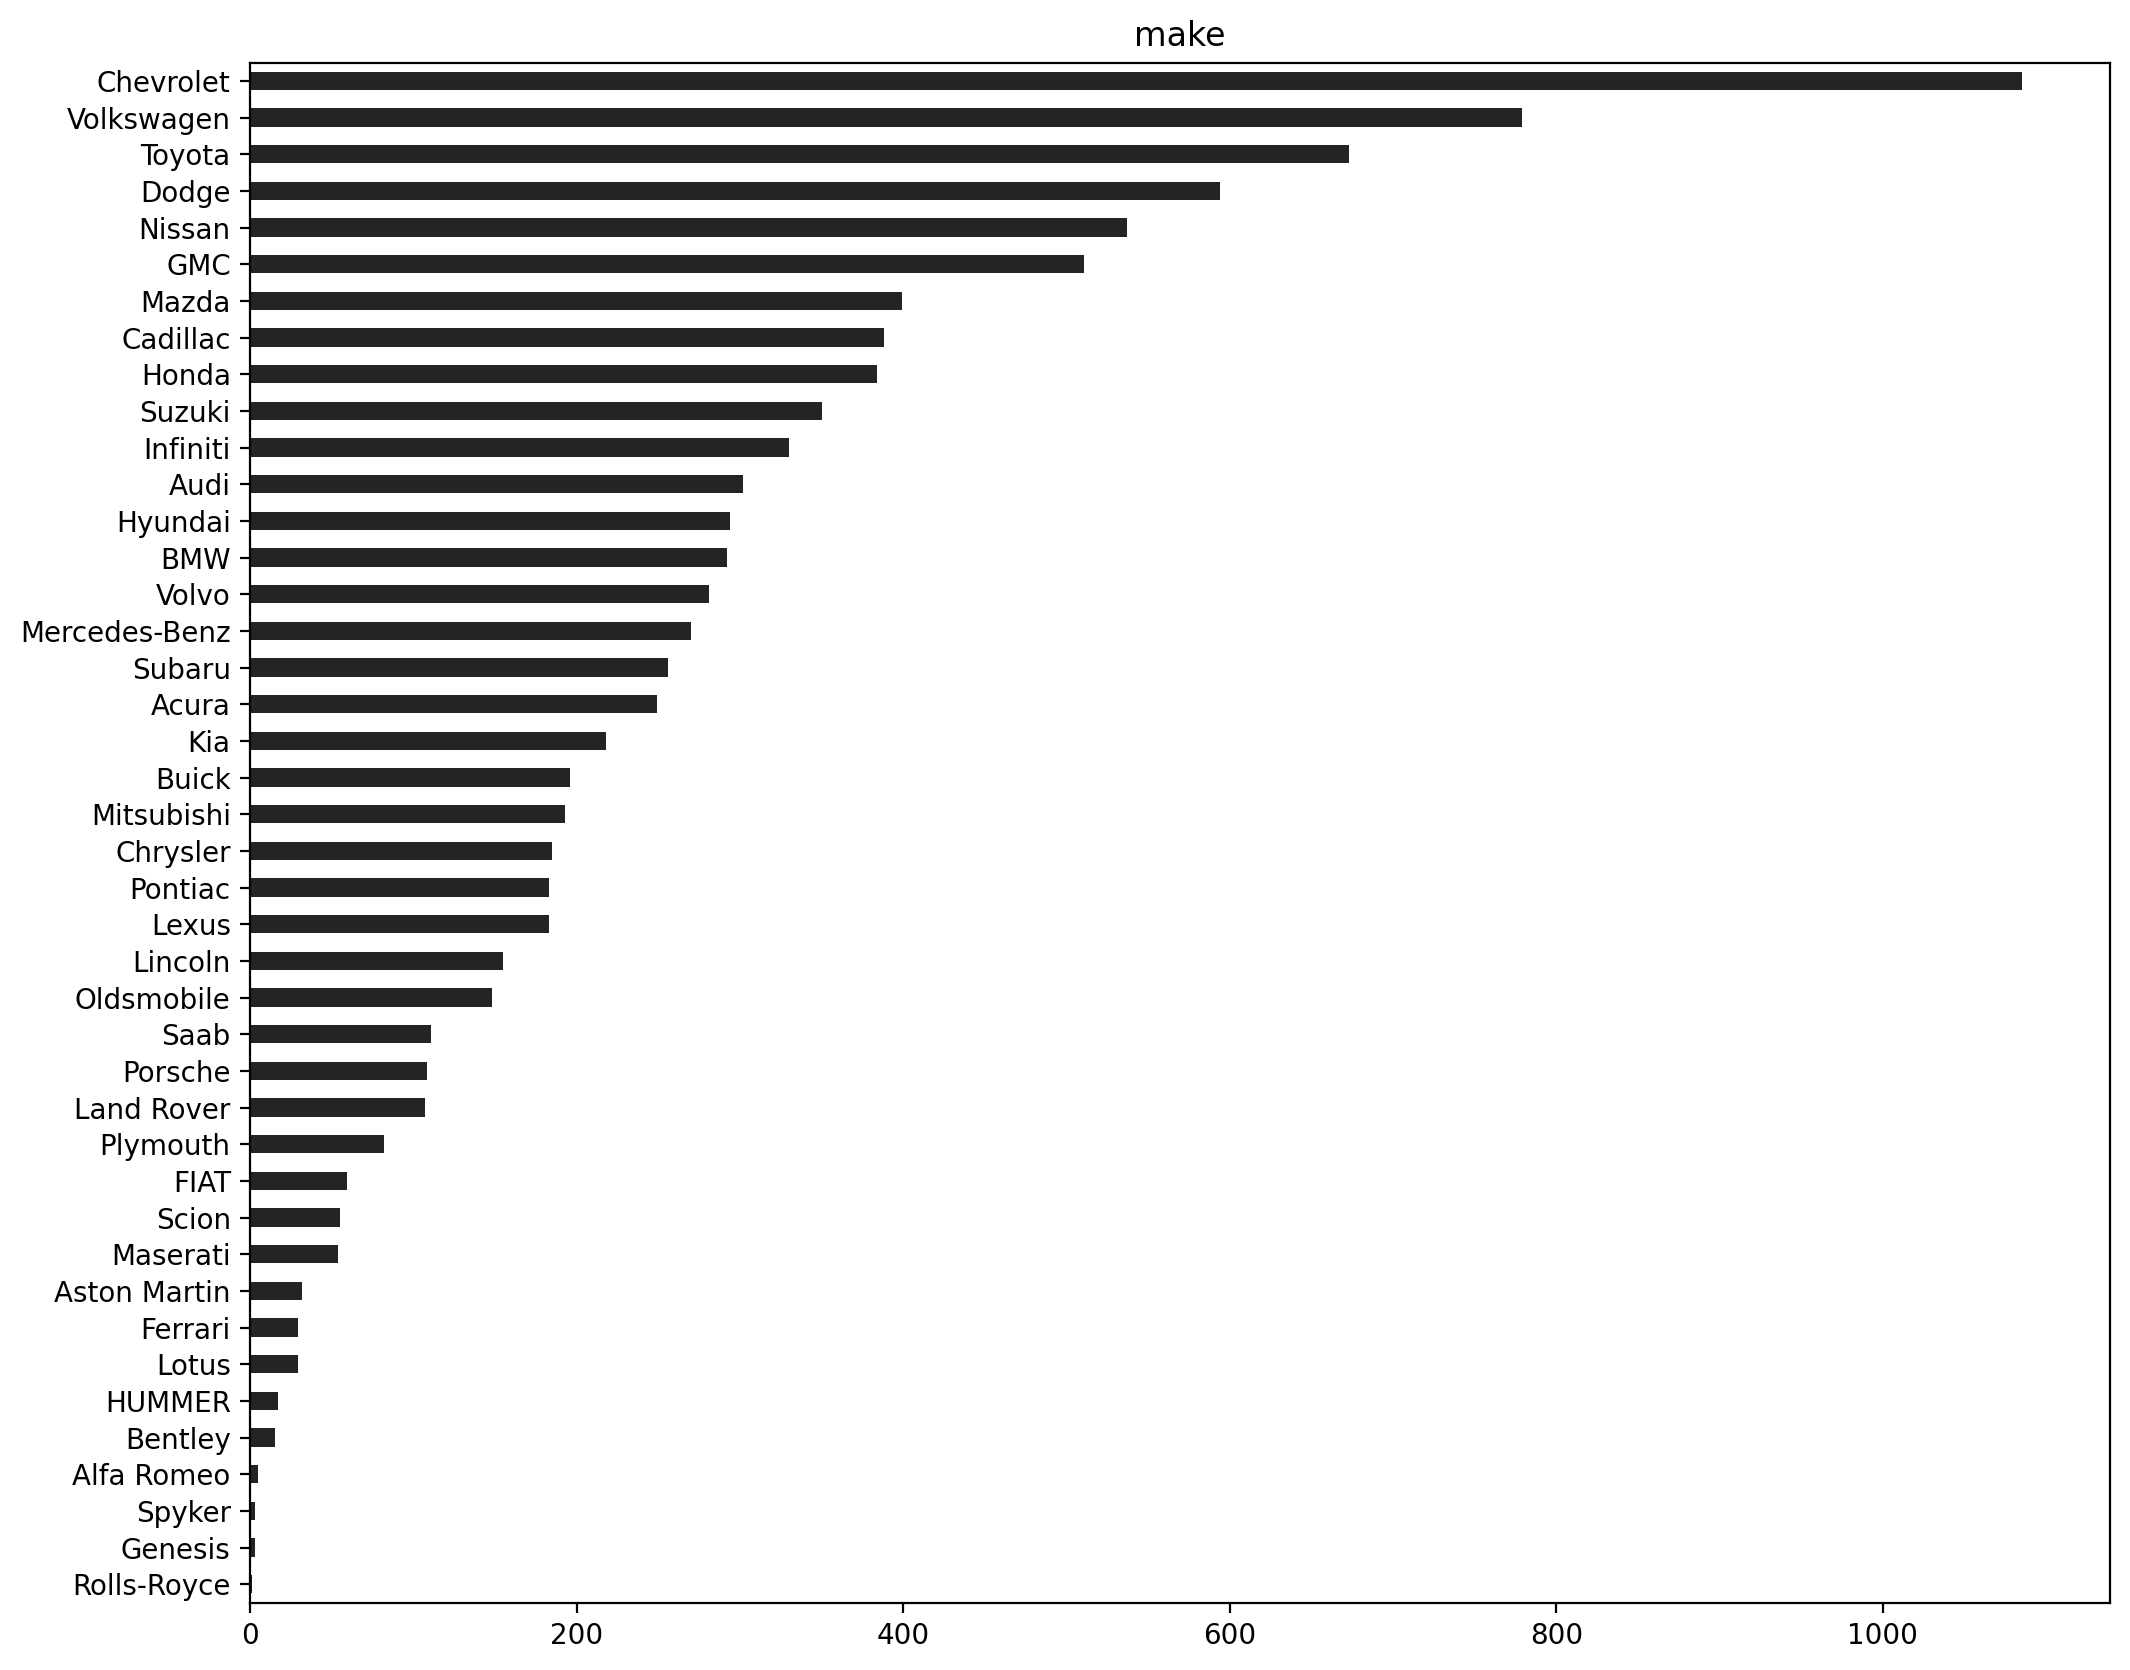

In [43]:
make_hist = df['make'].value_counts().sort_values()
make_hist.plot(kind='barh', x='index', figsize=(12,10), title='make');

In [44]:
df['model'].value_counts().to_frame()

model
Silverado 1500        156
Tundra                140
Sierra 1500            90
Beetle Convertible     89
Tacoma                 80
...                   ...
Sierra C3               1
Sigma                   1
Sixty Special           1
Syclone                 1
Zephyr                  1

[744 rows x 1 columns]

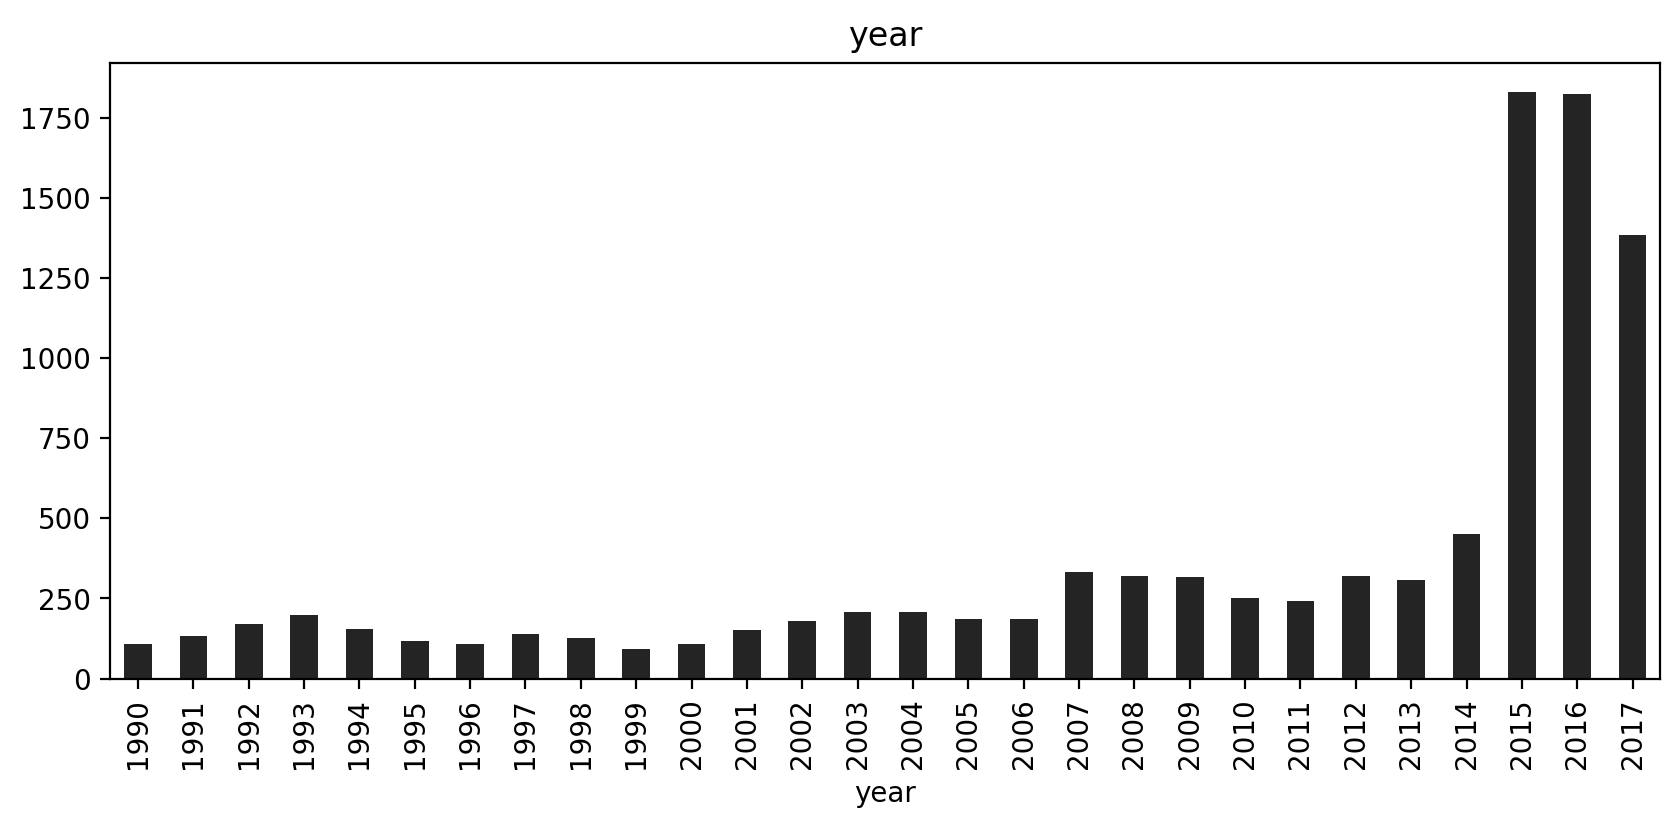

In [45]:
year_hist = df.groupby(['year']).size()
year_hist.plot(kind='bar', x='index', figsize=(10,4), title='year');

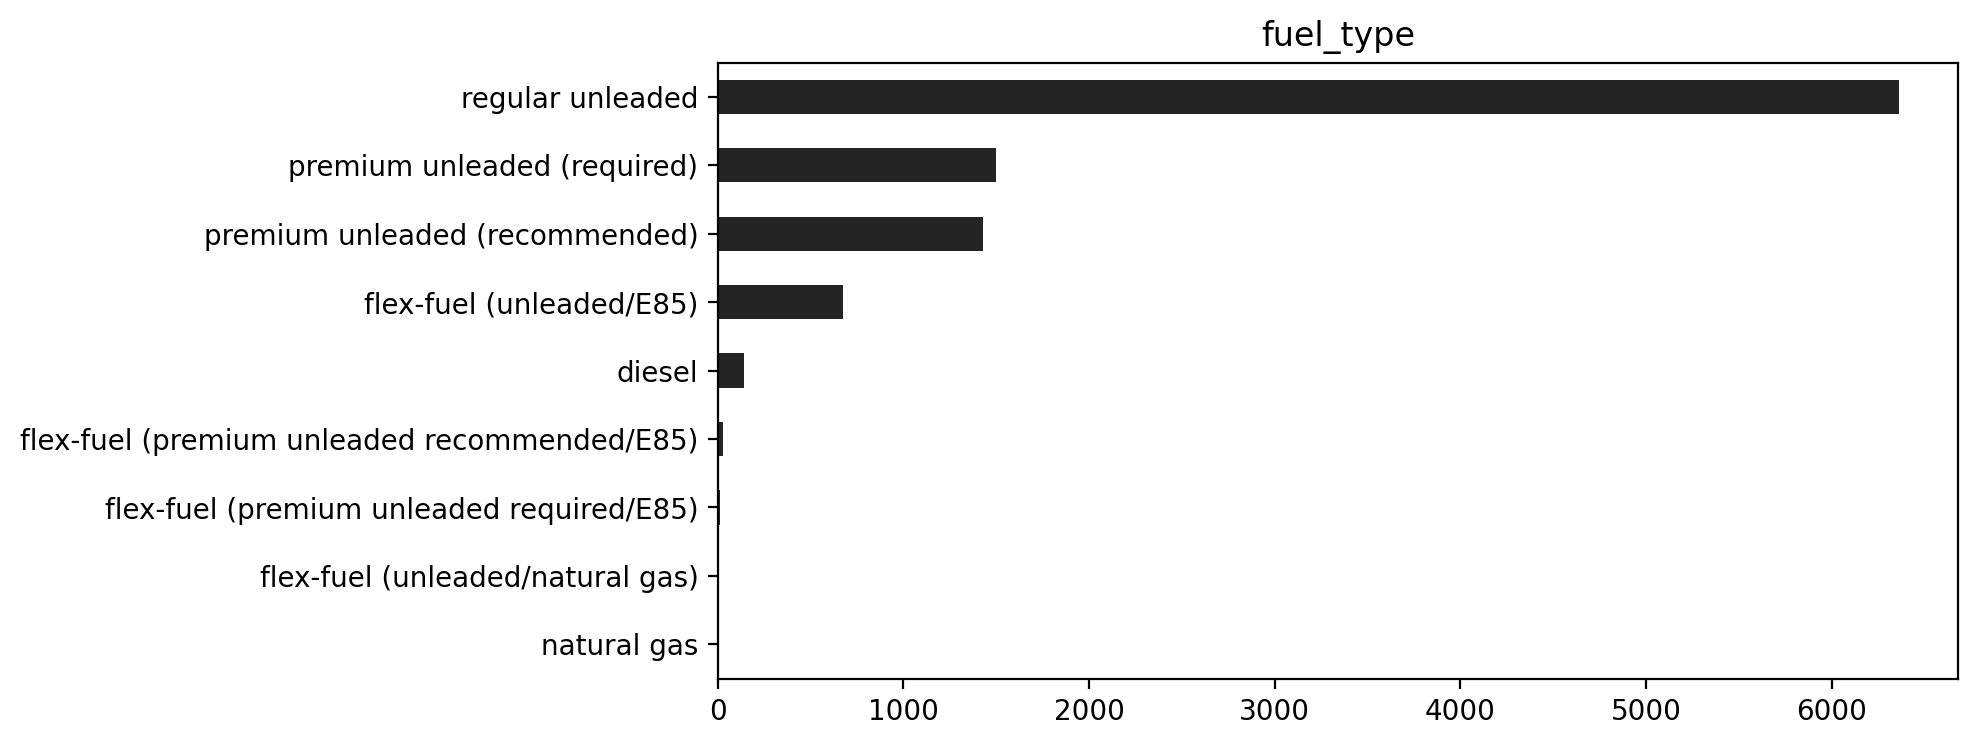

In [46]:
fuel_type_hist = df['fuel_type'].value_counts().sort_values()
fuel_type_hist.plot(kind='barh', x='index', figsize=(8,4), title='fuel_type');

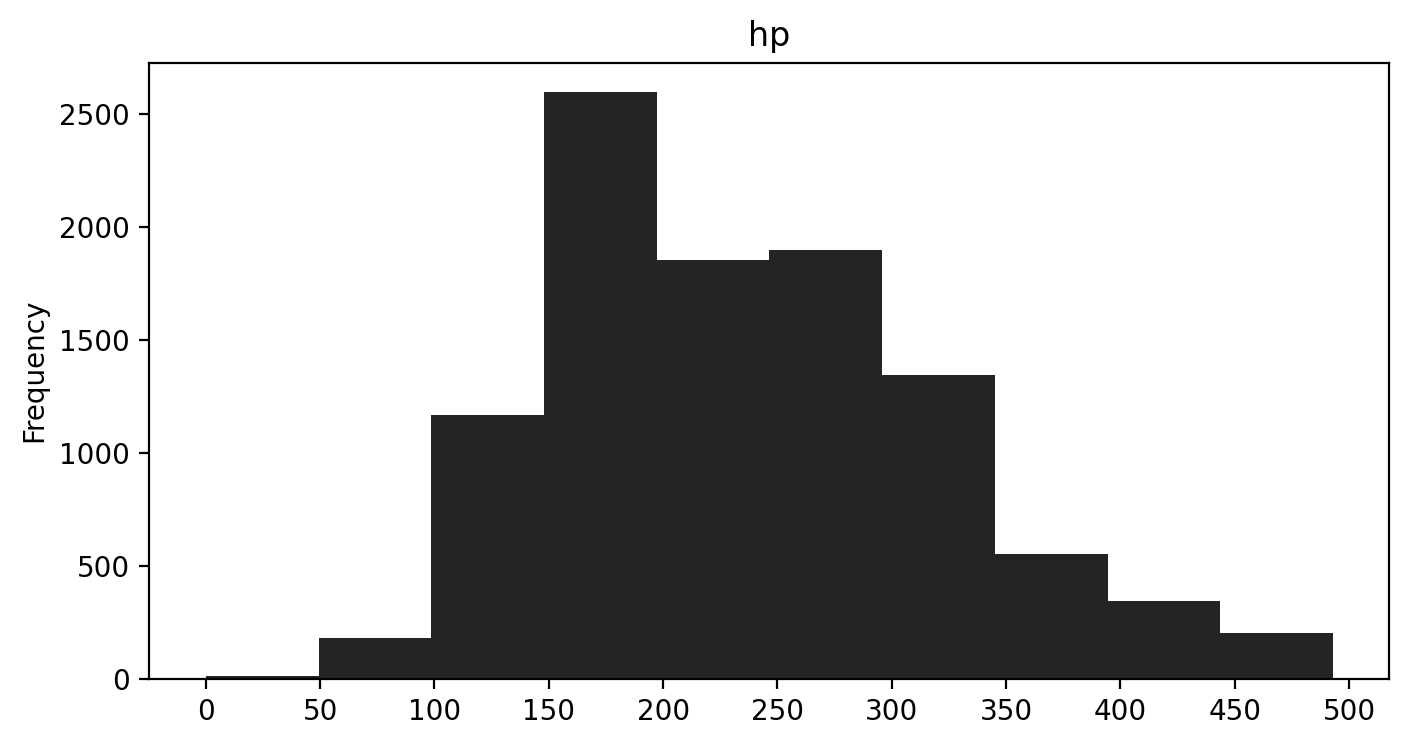

In [47]:
df['hp'].plot(kind='hist', grid=False, figsize=(8,4), title='hp', bins=10, xticks=range(0, 550, 50));

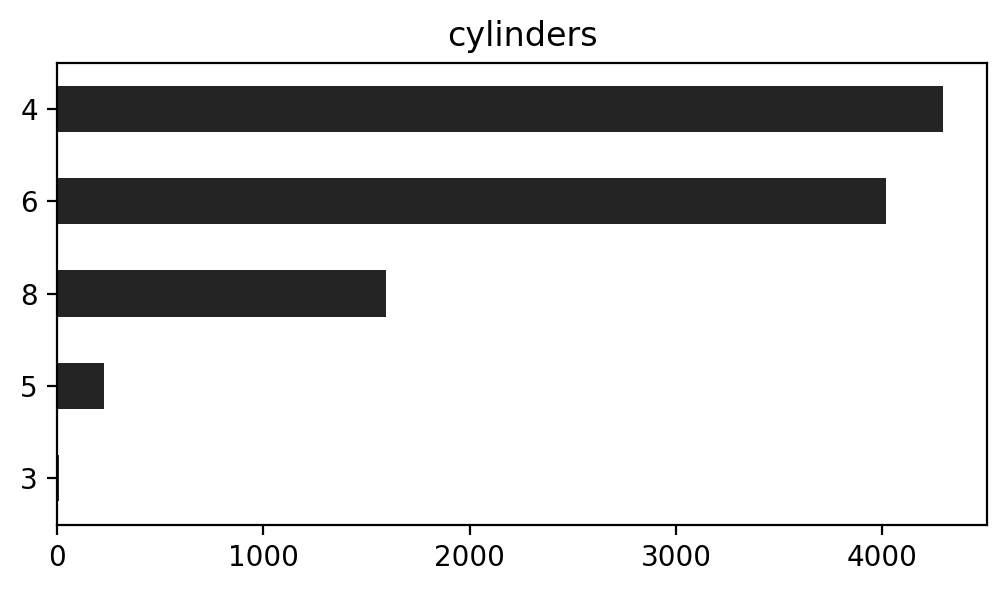

In [48]:
cylinders_hist = df['cylinders'].value_counts().sort_values()
cylinders_hist.plot(kind='barh', x='index', figsize=(6,3), title='cylinders');

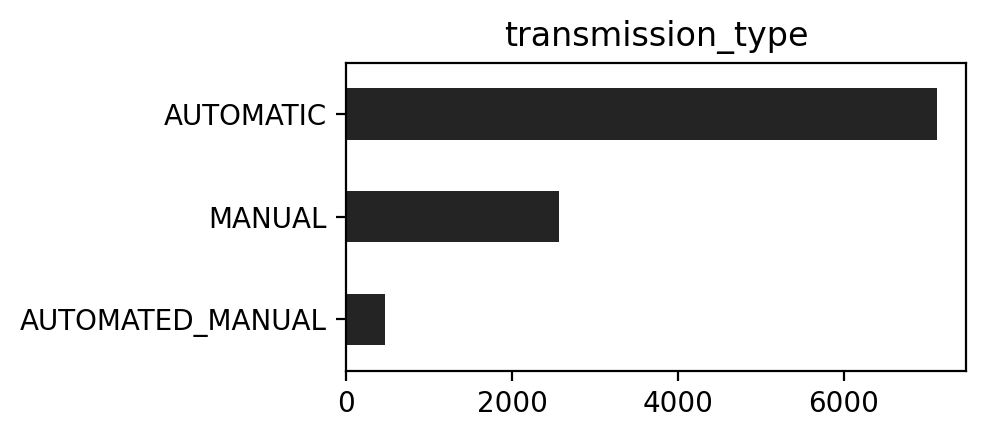

In [49]:
transmission_type_hist = df['transmission_type'].value_counts().sort_values()
transmission_type_hist.plot(kind='barh', x='index', figsize=(4,2), title='transmission_type');

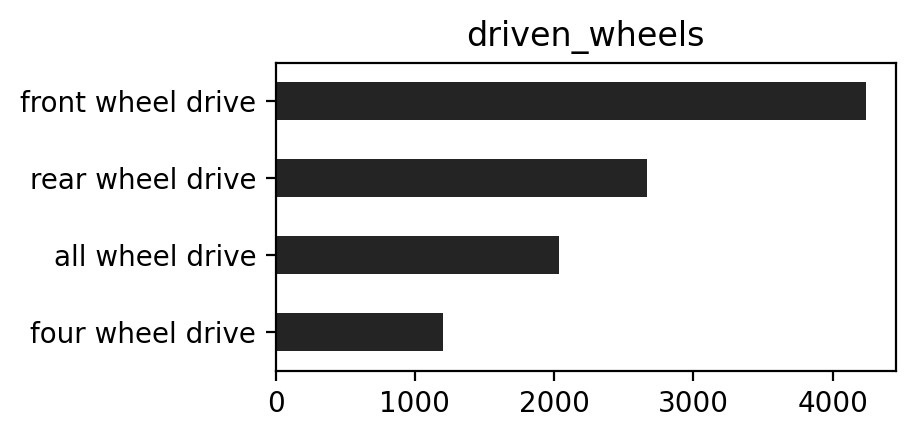

In [50]:
driven_wheels_hist = df['driven_wheels'].value_counts().sort_values()
driven_wheels_hist.plot(kind='barh', x='index', figsize=(4,2), title='driven_wheels');

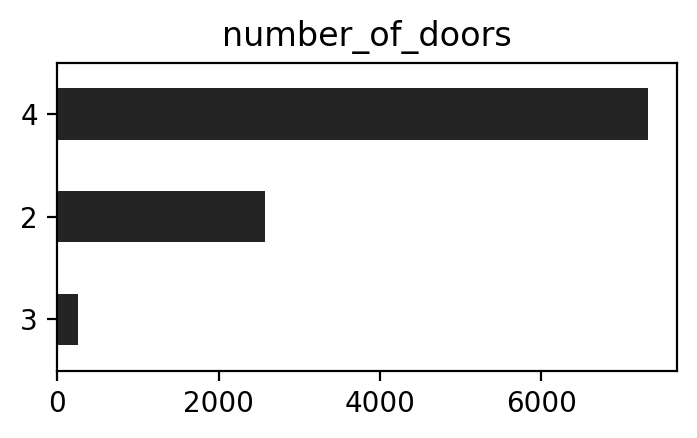

In [51]:
number_of_doors_hist = df['number_of_doors'].value_counts().sort_values()
number_of_doors_hist.plot(kind='barh', x='index', figsize=(4,2), title='number_of_doors');

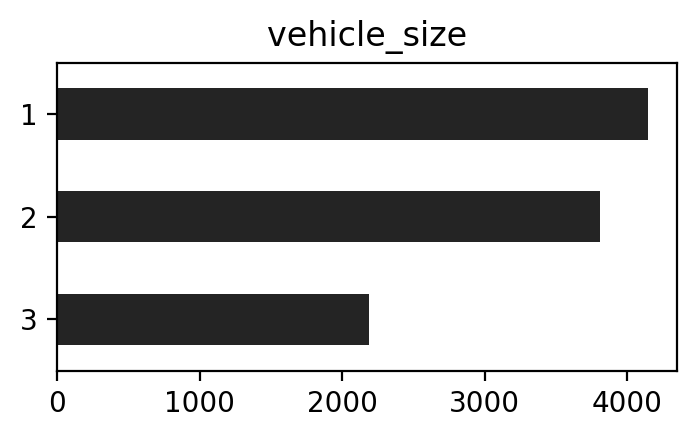

In [52]:
vehicle_size_hist = df['vehicle_size'].value_counts().sort_values()
vehicle_size_hist.plot(kind='barh', x='index', figsize=(4,2), title='vehicle_size');

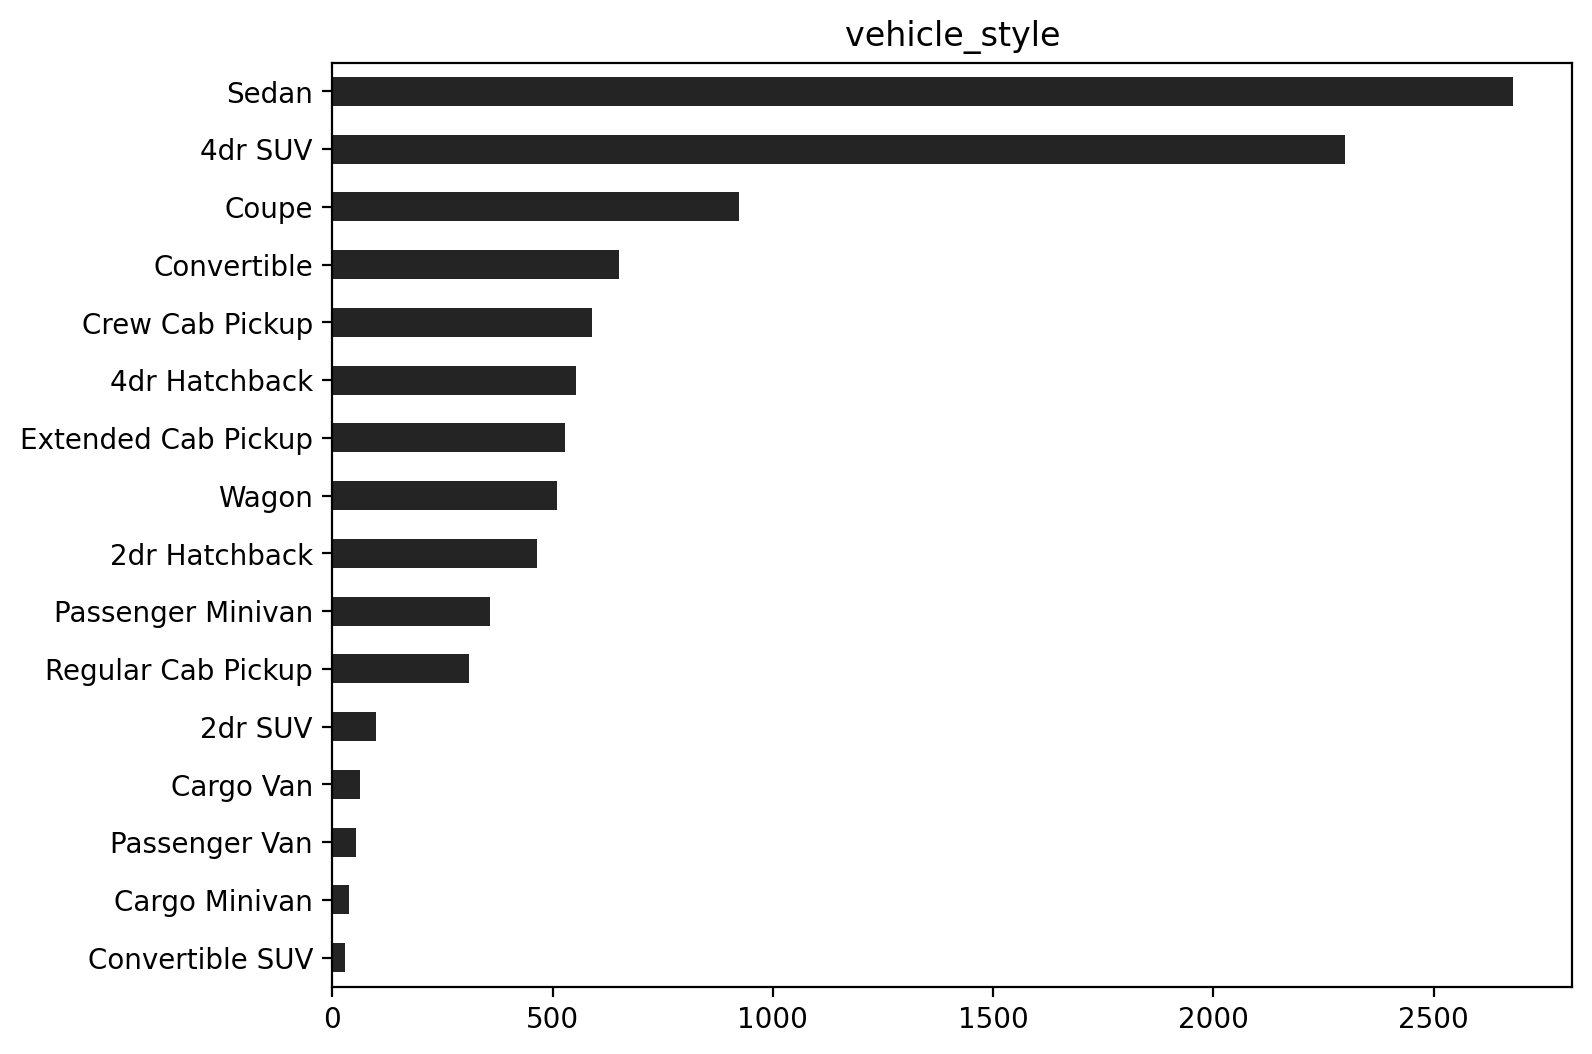

In [53]:
vehicle_style_hist = df['vehicle_style'].value_counts().sort_values()
vehicle_style_hist.plot(kind='barh', x='index', figsize=(8,6), title='vehicle_style');

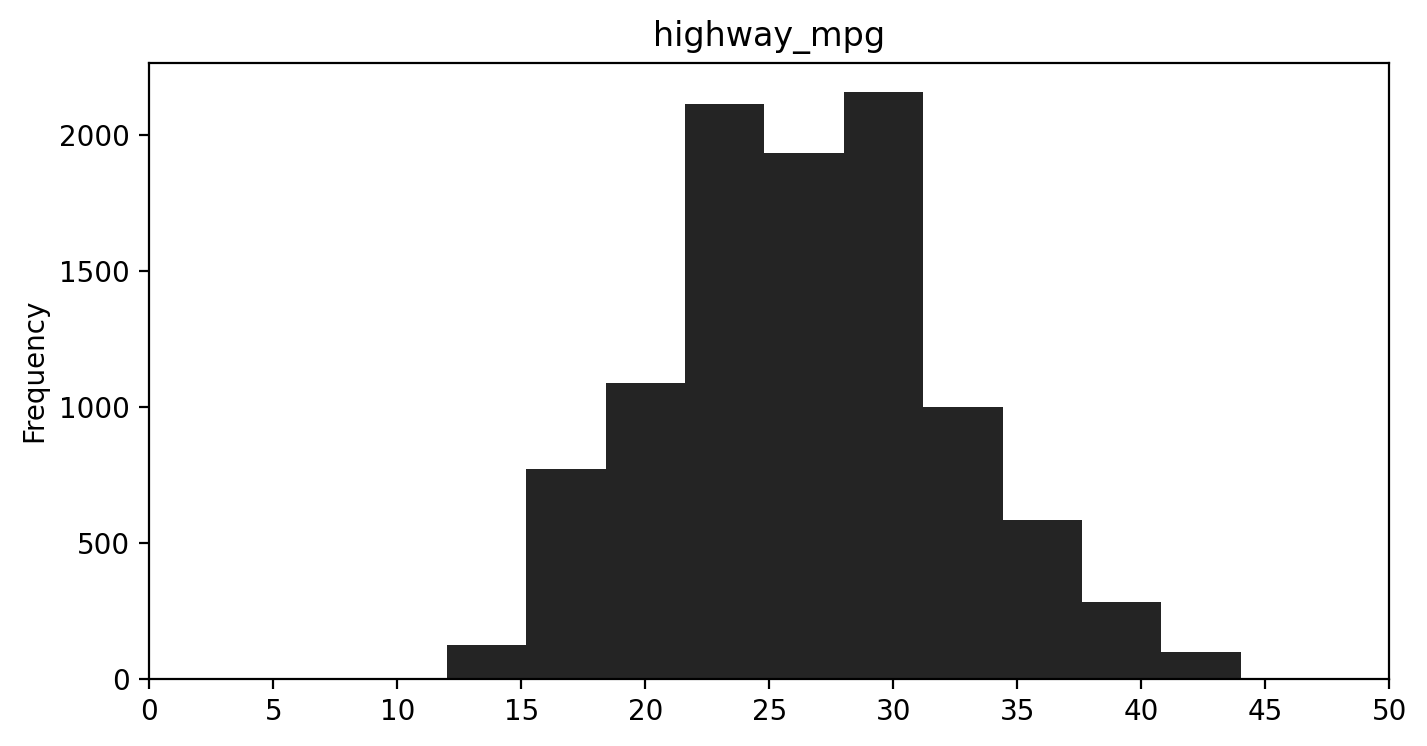

In [54]:
df['highway_mpg'].plot(kind='hist', grid=False, figsize=(8,4), title='highway_mpg', bins=10, xticks=range(0, 55, 5));

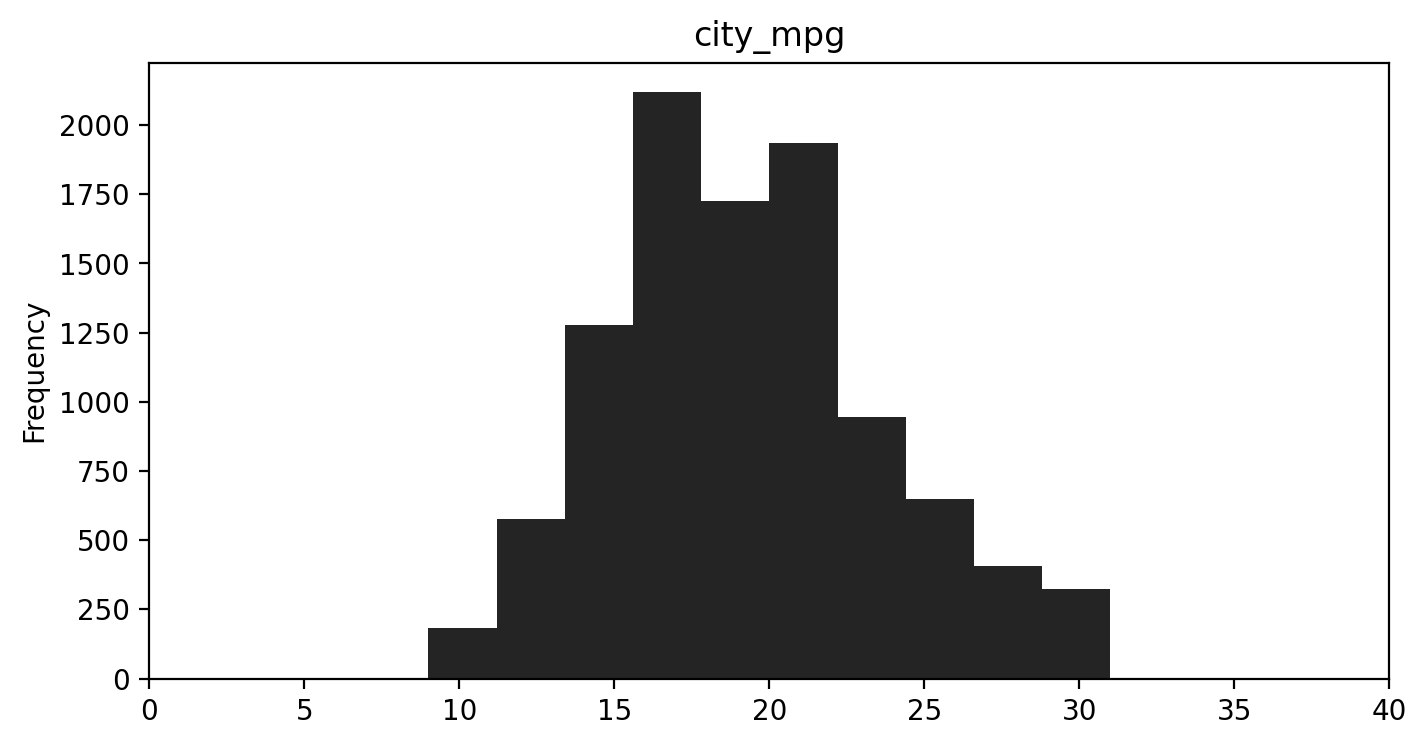

In [55]:
df['city_mpg'].plot(kind='hist', grid=False, figsize=(8,4), title='city_mpg', bins=10, xticks=range(0, 45, 5));

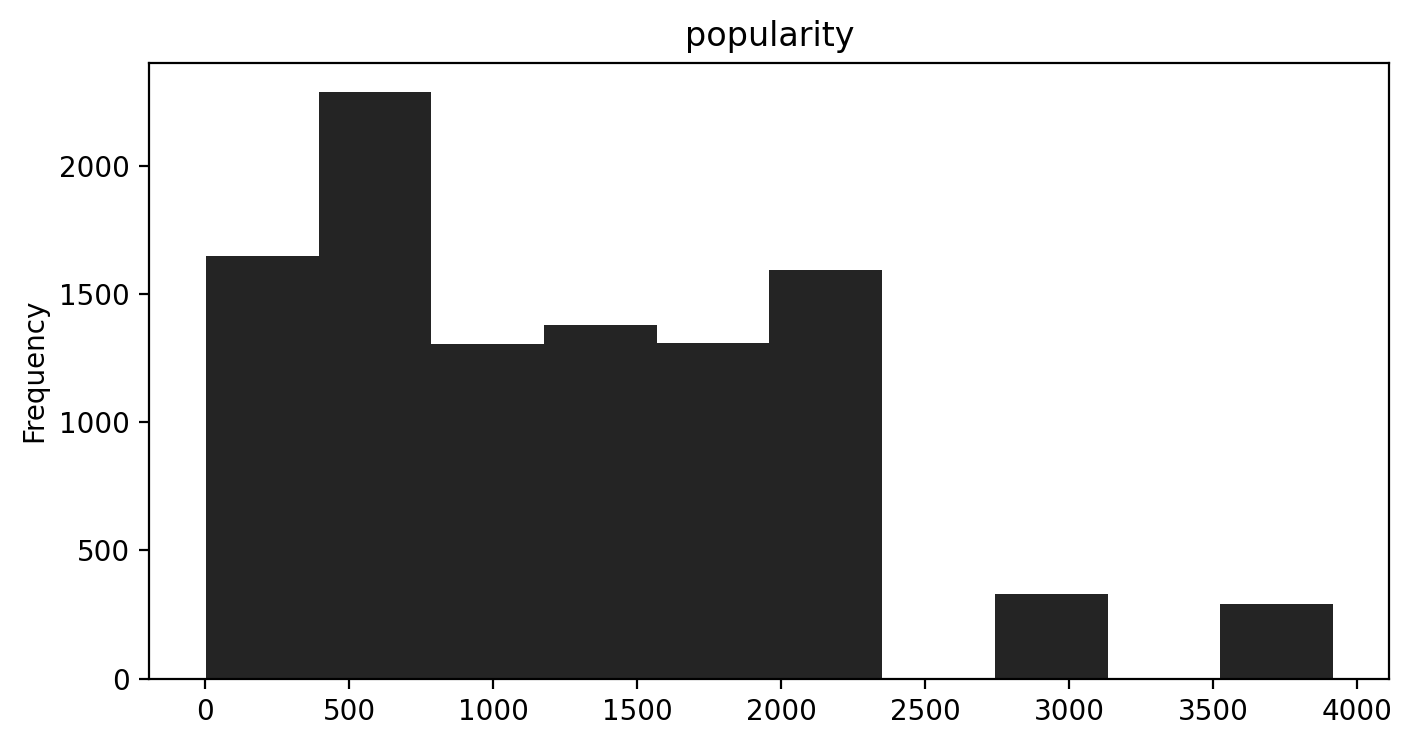

In [56]:
df['popularity'].plot(kind='hist', grid=False, figsize=(8,4), title='popularity', bins=10, xticks=range(0, 4500, 500));

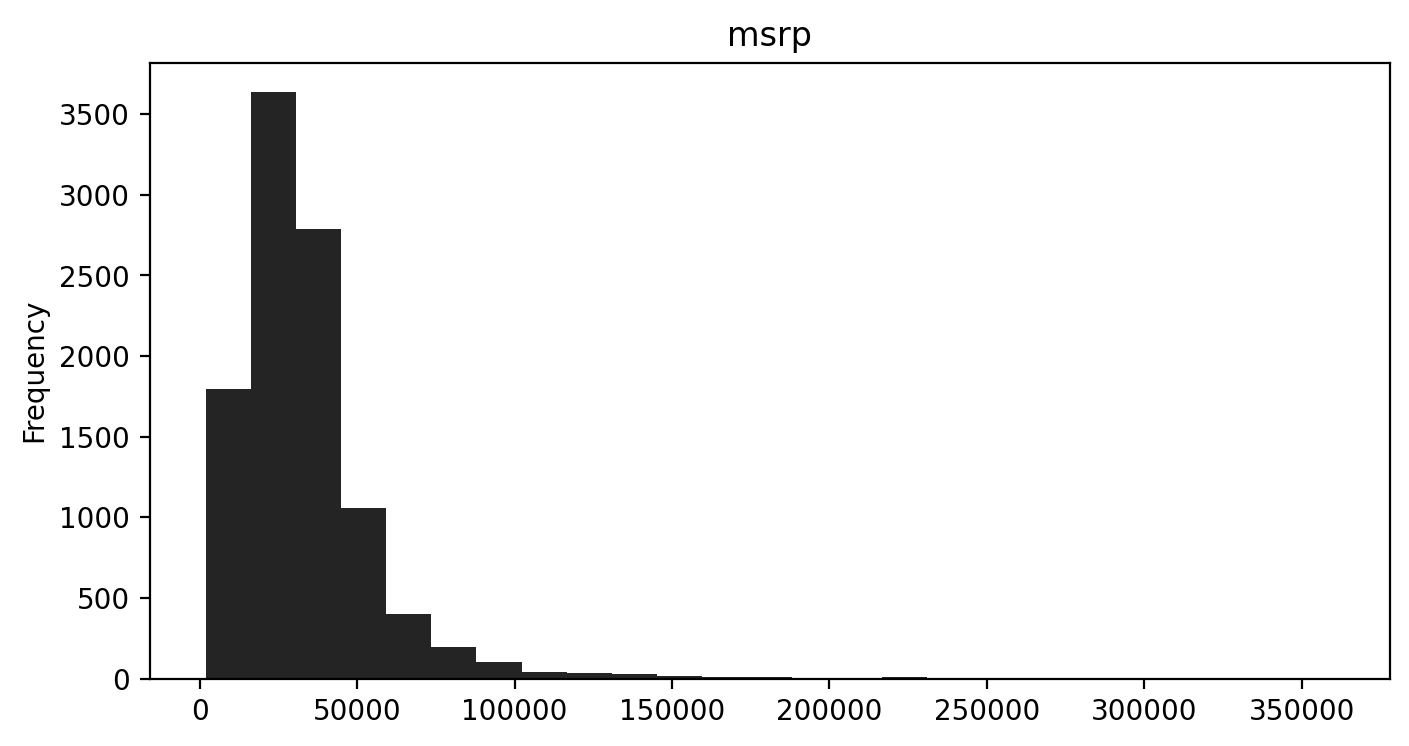

In [57]:
df['msrp'].plot(kind='hist', grid=False, figsize=(8,4), title='msrp', bins=25);

#### Summary

In [58]:
for c in df.columns:
    max, min = df[c].value_counts().max(), df[c].value_counts().min()
    max_val, min_val = df[c].value_counts().head(1).index[0], df[c].value_counts().tail(1).index[0]
    print("{}:  max = {} ({}), min = {} ({})".format(c.rjust(17), \
                                                    str(max_val).rjust(18), str(max).rjust(4), \
                                                    str(min_val).rjust(17), str(min).rjust(4)))

             make:  max =          Chevrolet (1085), min =       Rolls-Royce (   1)
            model:  max =     Silverado 1500 ( 156), min =            Zephyr (   1)
             year:  max =               2015 (1830), min =              1999 (  92)
        fuel_type:  max =   regular unleaded (6361), min =       natural gas (   2)
               hp:  max =                200 ( 398), min =               453 (   1)
        cylinders:  max =                  4 (4294), min =                 3 (  10)
transmission_type:  max =          AUTOMATIC (7122), min =  AUTOMATED_MANUAL ( 462)
    driven_wheels:  max =  front wheel drive (4240), min =  four wheel drive (1202)
  number_of_doors:  max =                  4 (7316), min =                 3 ( 256)
     vehicle_size:  max =                  1 (4145), min =                 3 (2188)
    vehicle_style:  max =              Sedan (2681), min =   Convertible SUV (  29)
      highway_mpg:  max =                 24 ( 801), min =                44

### Bivariate Analysis

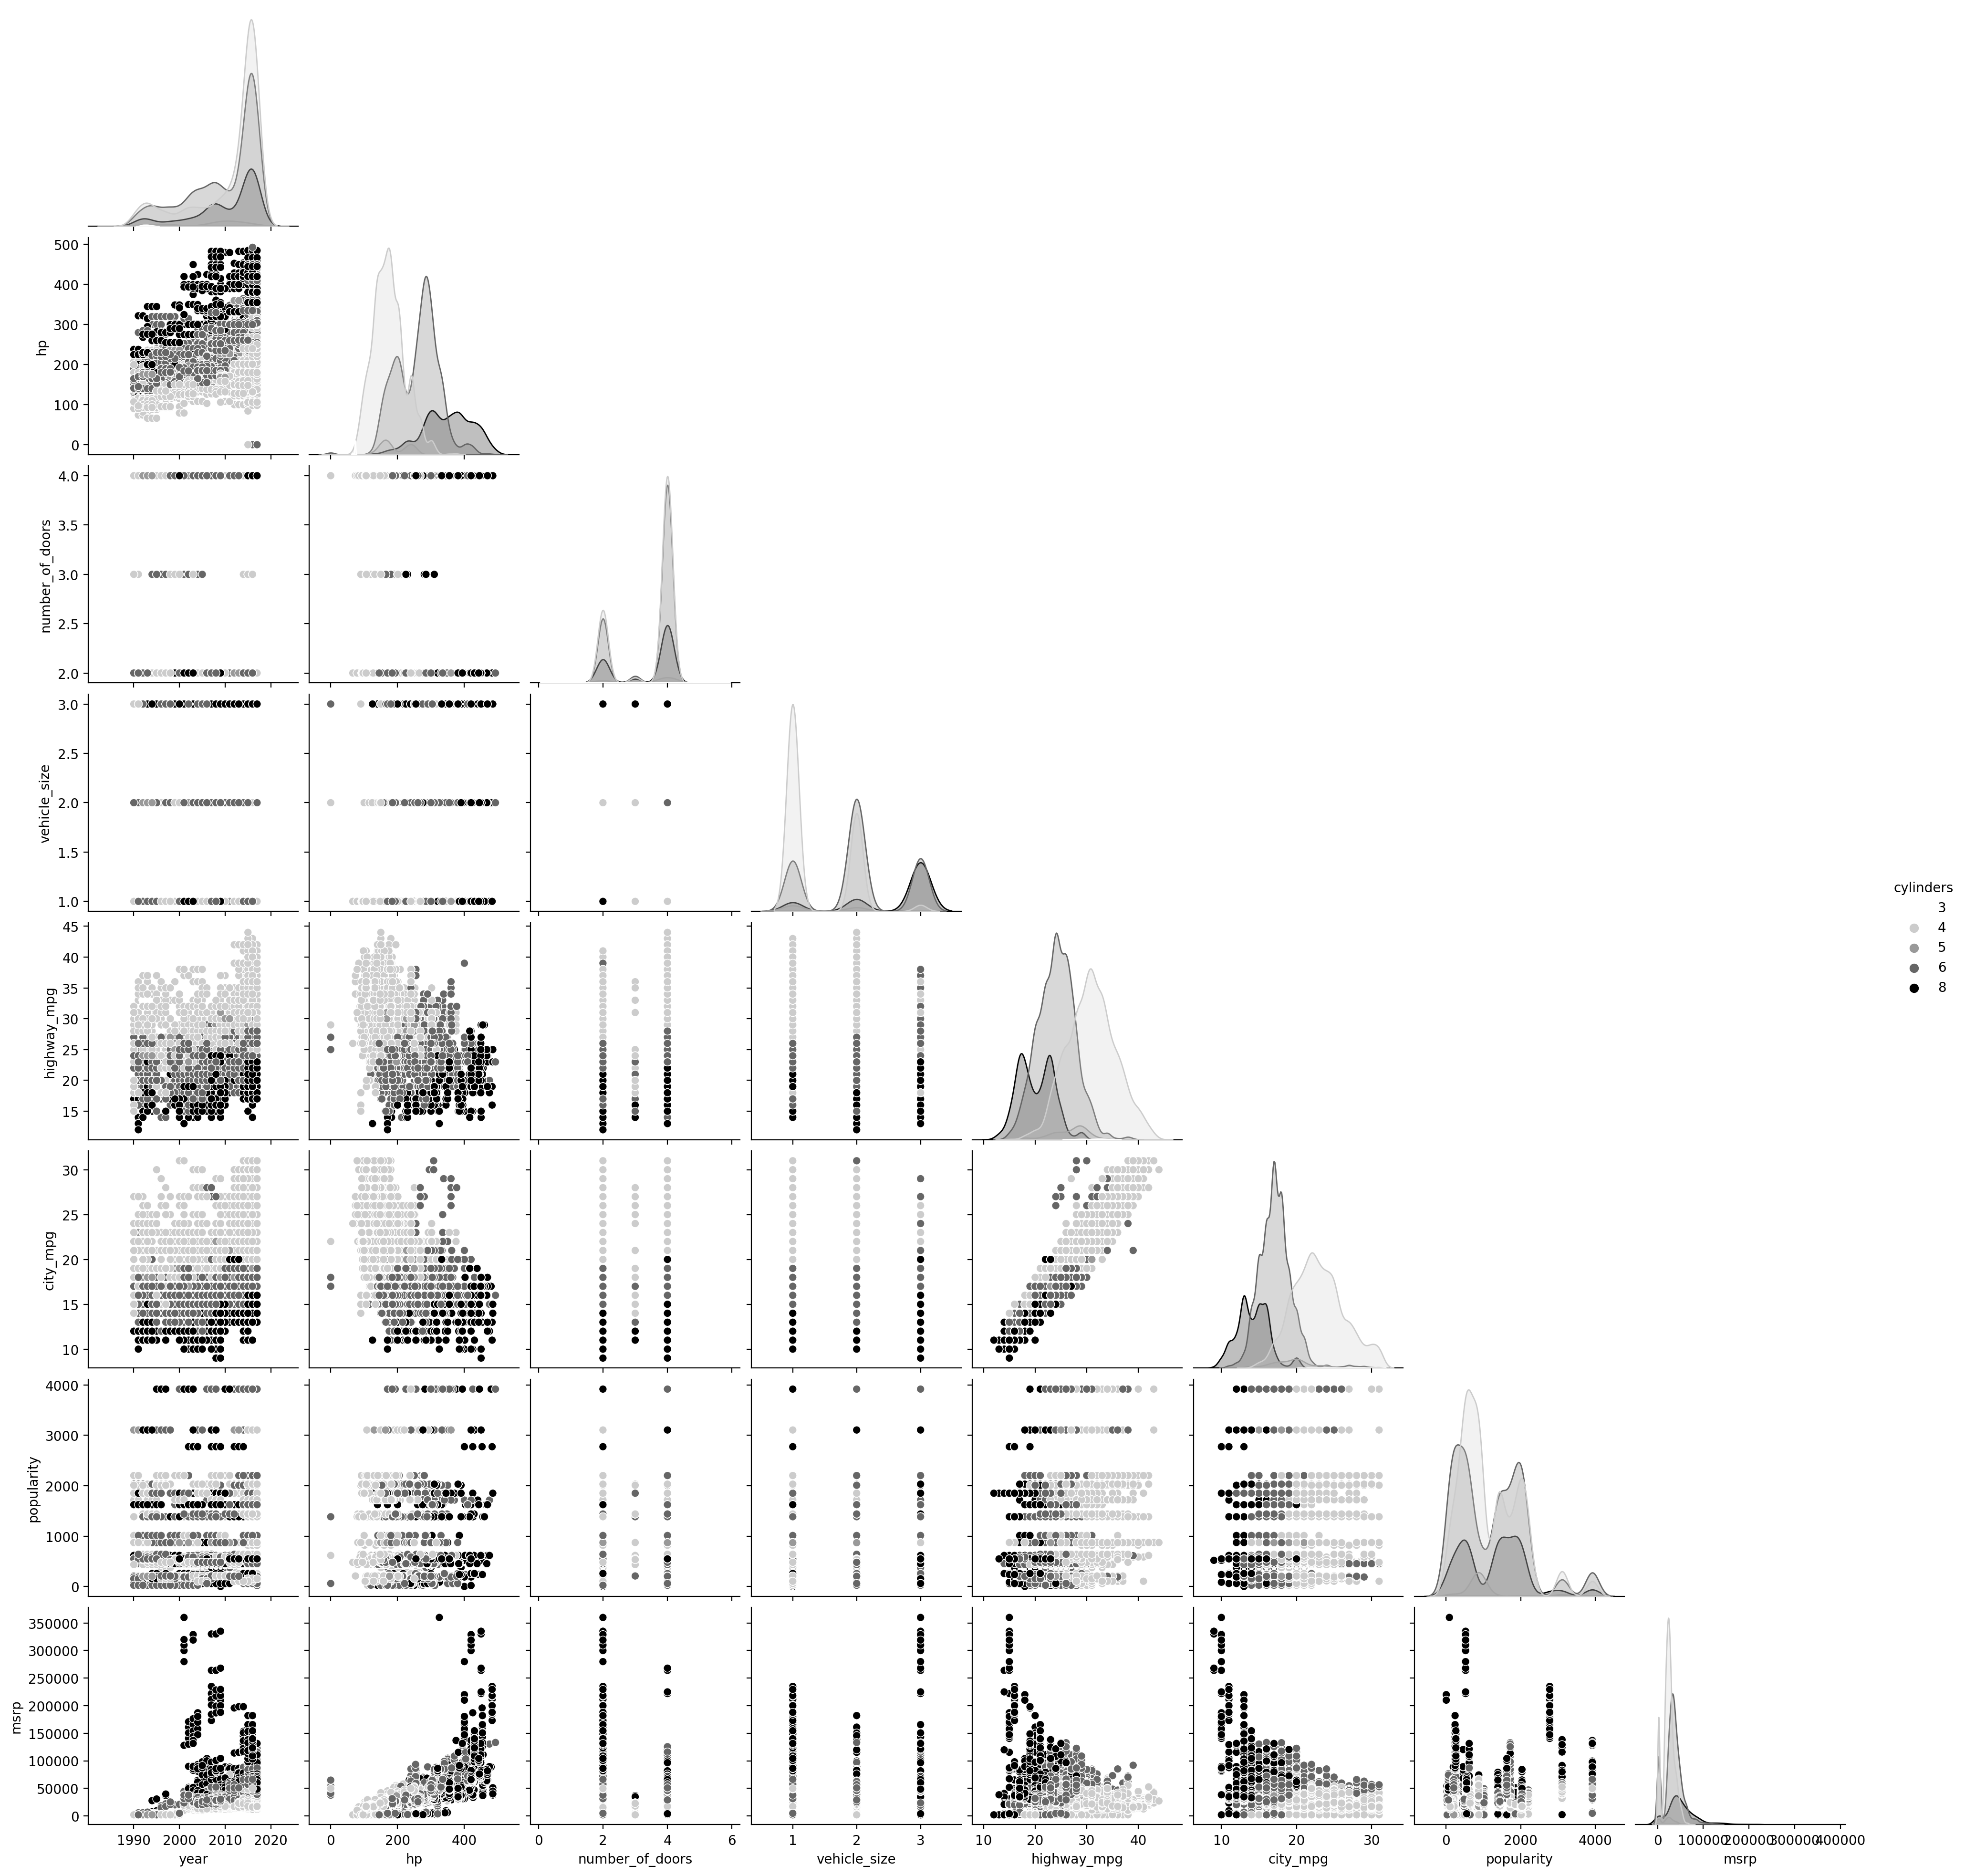

In [399]:
sns.pairplot(data=df, hue='cylinders', corner=True, palette="gist_gray_r");

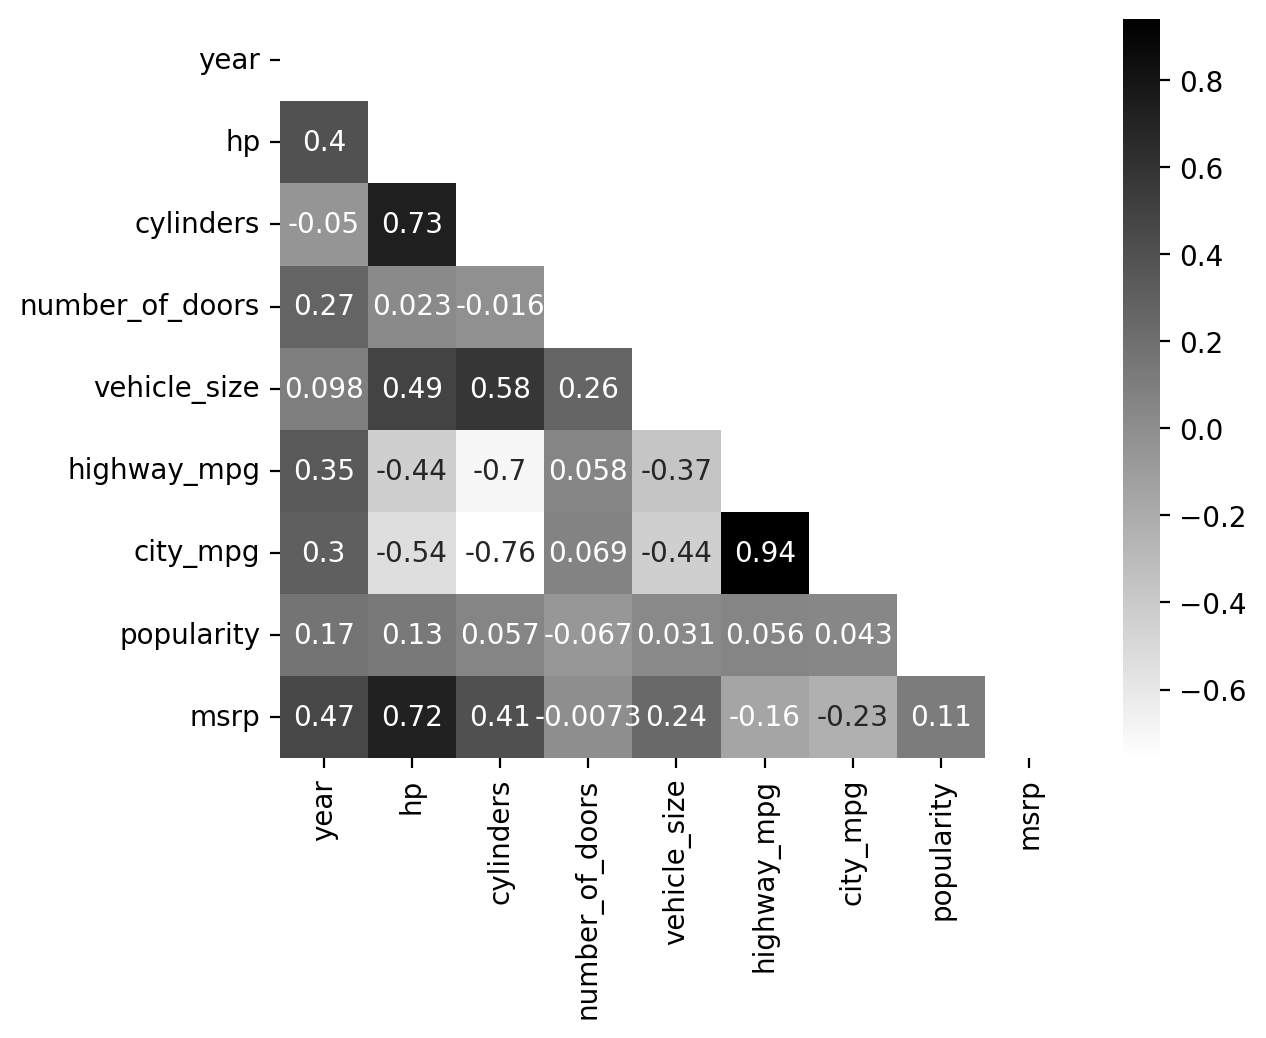

In [400]:
corr = df.corr(numeric_only=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap="gist_gray_r");

#### Summary
- The *year* variable has a `moderate positive` correlation (0.47) with *msrp*, indicating that newer cars tend to have higher prices.
- The *hp* variable has a `strong positive` correlation (0.72) with *msrp*, indicating that cars with higher horsepower tend to have higher prices.
- The *cylinders* variable has a `moderate positive` correlation (0.41) with *msrp*, indicating that cars with more cylinders tend to have higher prices.
- The *number_of_doors* variable has a `very weak negative` correlation (-0.007) with *msrp*, indicating that the number of doors does not have a significant impact on the price of the car.
- The *vehicle_size* variable has a `weak positive` correlation (0.24) with *msrp*, indicating that larger cars tend to have higher prices.
- The *highway_mpg* variable has a `weak negative` correlation (-0.16) with *msrp*, indicating that cars with better fuel economy tend to have lower prices. (The world's most expensive vehicles are designed with power, speed, and style in mind, with less of a focus on fuel economy)
- The *city_mpg* variable has a `weak negative` correlation (-0.23) with *msrp*, indicating that cars with better fuel economy in the city tend to have lower prices. (The world's most expensive vehicles are designed with power, speed, and style in mind, with less of a focus on fuel economy)
- The *popularity* variable has a `weak positive` correlation (0.11) with *msrp*, indicating that more popular cars tend to have higher prices.

## Feature Selection
Reduce the number of input variables to both reduce the computational cost of modeling and improve the performance of the model.

### Selection Method
- **Univariate Selection**: Select those features that have the strongest relationship with the output variable.
- **Recursive Feature Elimination (RFE)**: Recursively remove attributes and build a model on those attributes that remain.
- **Principal Component Analysis (PCA)**: Choose the number of dimensions or principal component in the transformed result.
- **Feature Importance**: Estimate the importance of features based on bagged decision trees like Random Forest.

![](https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)

*Image source: [Machine Learning Mastery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)*

> Regression Feature Selection is performed using `Pearson’s Correlation Coefficient (R)` via the f_regression() function.

In [ ]:
# Select features that have low or no correlation with each other to avoid multicollinearity issues and obtain more accurate and interpretable regression results.
numeric_features = [c for c in numeric_features if c not in ["cylinders", "highway_mpg"]]
numeric_features

['hp', 'number_of_doors', 'popularity', 'year', 'vehicle_size', 'city_mpg']

Feature  0:              hp = (4346.868)
Feature  1: number_of_doors = (259.281)
Feature  2:      popularity = (76.861)
Feature  3:            year = (13284.621)
Feature  4:    vehicle_size = (309.105)
Feature  5:        city_mpg = (6.764)


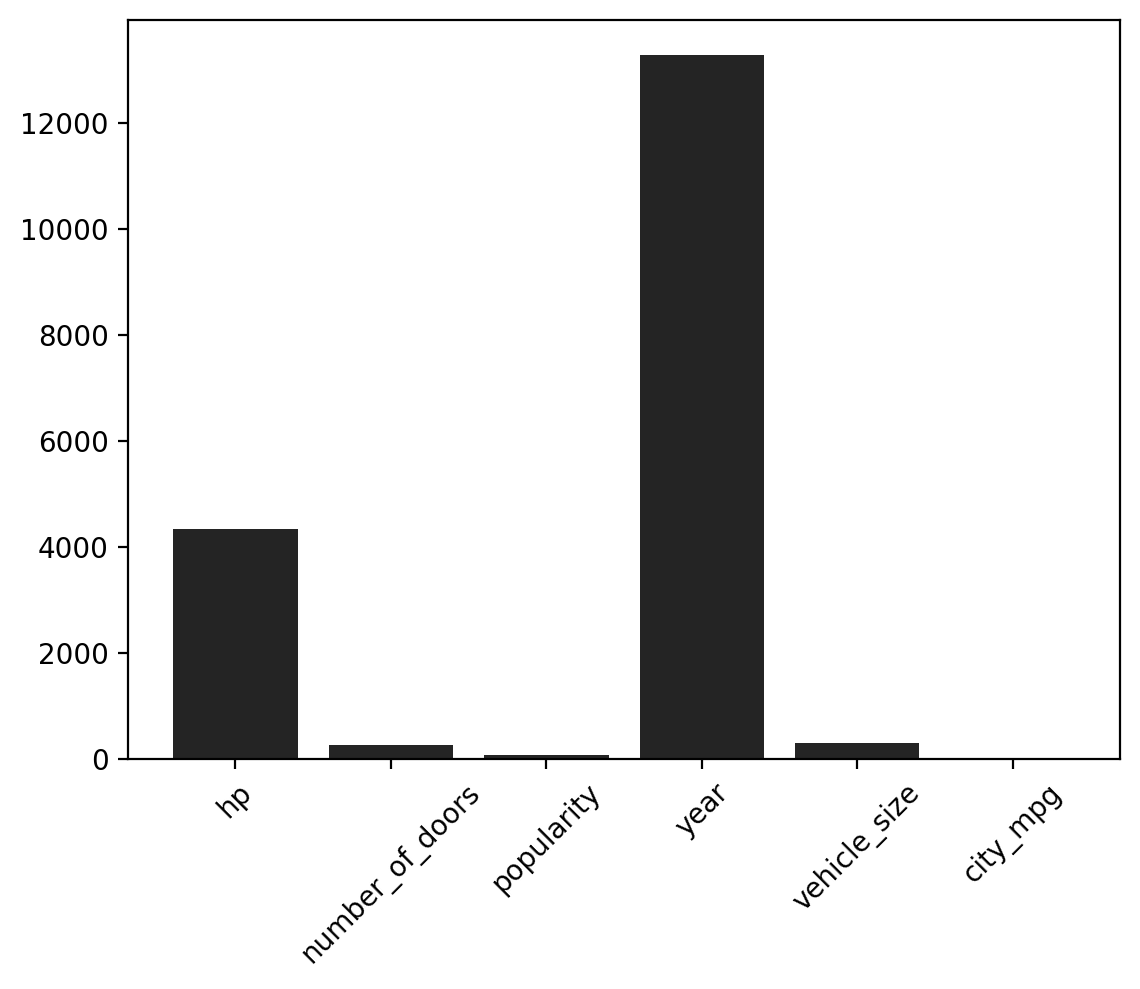

In [369]:
# Apply the correlation feature selection to the numerical data.
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# onehot_df = pd.get_dummies(df[numeric_features + ['transmission_type', 'fuel_type', 'driven_wheels']])
# dd = pd.concat([onehot_df, df[target_variable]], axis=1)
dd = df[numeric_features + target_variable]
x = dd.drop('msrp', axis=1).values
y = np.log1p(dd['msrp']).values

# data split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i, score in enumerate(fs.scores_):
	print("Feature {}: {:<15} = ({:4.3f})".format(str(i).rjust(2), list(dd.columns)[:-1][i].rjust(15), score))
# plot the scores
plt.bar(list(dd.columns)[:-1], fs.scores_)
plt.xticks(rotation=45)
# plt.yticks()
plt.show()

#### One-hot Encoding

In [ ]:
# onehot_df = pd.get_dummies(df[numeric_features])
# onehot_df = pd.get_dummies(df[numeric_features + ['transmission_type', 'fuel_type', 'driven_wheels']])
onehot_df = pd.get_dummies(df[numeric_features + categorical_features])
pd.concat([onehot_df, df[target_variable]], axis=1)

hp  cylinders  number_of_doors  highway_mpg  popularity  year  \
0      335          6                2           26        3916  2011   
1      300          6                2           28        3916  2011   
2      300          6                2           28        3916  2011   
3      230          6                2           28        3916  2011   
4      230          6                2           28        3916  2011   
...    ...        ...              ...          ...         ...   ...   
11909  300          6                4           23         204  2012   
11910  300          6                4           23         204  2012   
11911  300          6                4           23         204  2012   
11912  300          6                4           23         204  2013   
11913  221          6                4           26          61  2006   

       vehicle_size  city_mpg  driven_wheels_all wheel drive  \
0                 1        19                              0   
1                 1        19                              0   
2                 1        20                              0   
3                 1        18                              0   
4                 1        18                              0   
...             ...       ...                            ...   
11909             2        16                              1   
11910             2        16                              1   
11911             2        16                              1   
11912             2        16                              1   
11913             2        17                              0   

       driven_wheels_four wheel drive  ...  vehicle_style_Extended Cab Pickup  \
0                                   0  ...                                  0   
1                                   0  ...                                  0   
2                                   0  ...                                  0   
3                                   0  ...                                  0   
4                                   0  ...                                  0   
...                               ...  ...                                ...   
11909                               0  ...                                  0   
11910                               0  ...                                  0   
11911                               0  ...                                  0   
11912                               0  ...                                  0   
11913                               0  ...                                  0   

       vehicle_style_Passenger Minivan  vehicle_style_Passenger Van  \
0                                    0                            0   
1                                    0                            0   
2                                    0                            0   
3                                    0                            0   
4                                    0                            0   
...                                ...                          ...   
11909                                0                            0   
11910                                0                            0   
11911                                0                            0   
11912                                0                            0   
11913                                0                            0   

       vehicle_style_Regular Cab Pickup  vehicle_style_Sedan  \
0                                     0                    0   
1                                     0                    0   
2                                     0                    0   
3                                     0                    0   
4                                     0                    0   
...                                 ...                  ...   
11909                                 0                    0   
11910                   

Feature  0:                                                      hp = (4346.868)
Feature  1:                                         number_of_doors = (259.281)
Feature  2:                                              popularity = (76.861)
Feature  3:                                                    year = (13284.621)
Feature  4:                                            vehicle_size = (309.105)
Feature  5:                                                city_mpg = (6.764)
Feature  6:                      transmission_type_AUTOMATED_MANUAL = (119.738)
Feature  7:                             transmission_type_AUTOMATIC = (673.386)
Feature  8:                                transmission_type_MANUAL = (1131.454)
Feature  9:                                        fuel_type_diesel = (15.708)
Feature 10:  fuel_type_flex-fuel (premium unleaded recommended/E85) = (9.030)
Feature 11:     fuel_type_flex-fuel (premium unleaded required/E85) = (8.883)
Feature 12:                      fuel_type_f

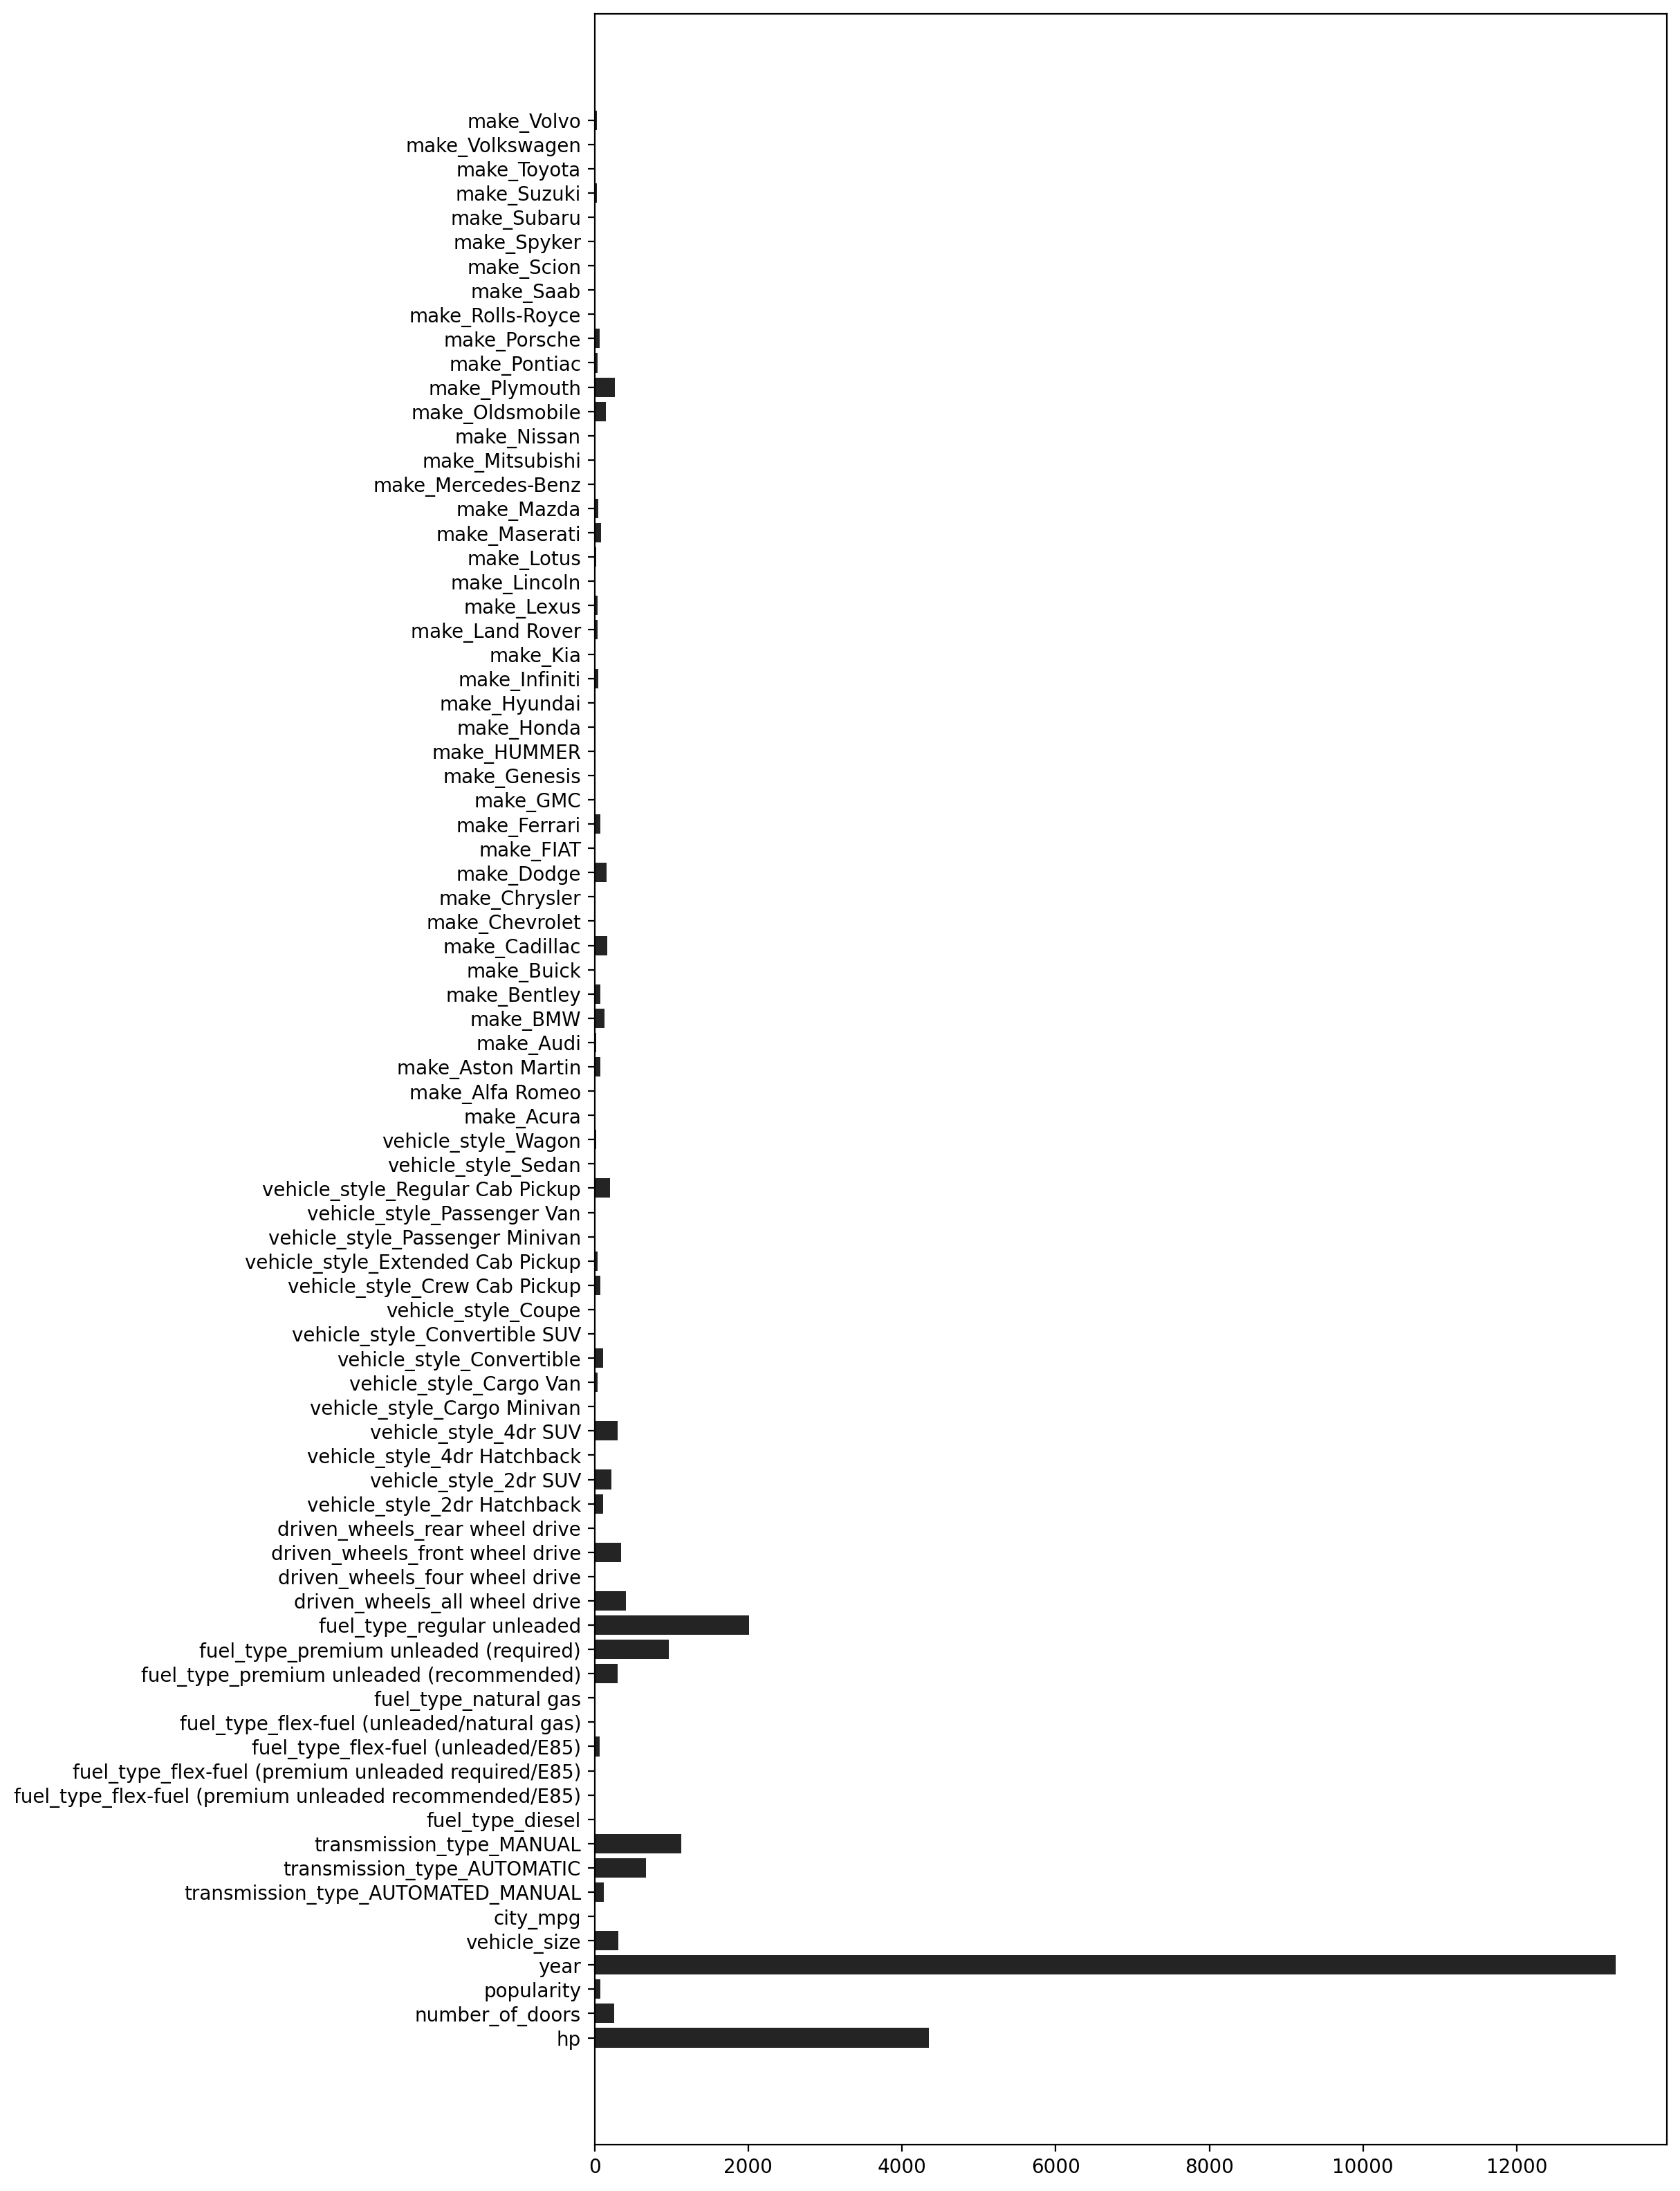

In [372]:
# Apply the correlation feature selection to the numerical data.
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

onehot_df = pd.get_dummies(df[numeric_features + ['transmission_type', 'fuel_type', 'driven_wheels', 'vehicle_style', 'make']])
dd = pd.concat([onehot_df, df[target_variable]], axis=1)
# dd = df[numeric_features + target_variable]
x = dd.drop('msrp', axis=1).values
y = np.log1p(dd['msrp']).values

# data split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i, score in enumerate(fs.scores_):
	print("Feature {}: {:<15} = ({:4.3f})".format(str(i).rjust(2), list(dd.columns)[:-1][i].rjust(55), score))

# plot the scores
plt.figure(figsize=(10,20))
plt.barh(list(dd.columns)[:-1], fs.scores_)
# plt.xticks(rotation=90)
plt.yticks()
plt.show()

### Modeling With Selected Features

In [380]:
# evaluation of a model using n features chosen with correlation
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# define dataset
onehot_df = pd.get_dummies(df[numeric_features + ['transmission_type', 'fuel_type', 'driven_wheels', 'vehicle_style', 'make']])
dd = pd.concat([onehot_df, df[target_variable]], axis=1)
# dd = df[numeric_features + target_variable]
x = dd.drop('msrp', axis=1).values
y = np.log1p(dd['msrp']).values

# data split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# model training
model = LinearRegression()
model.fit(X_train_fs, y_train)

# model prediction
y_pred = model.predict(X_test_fs)

# model evaluation
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R-squared: %.3f' % r2)
print('RMSE: %.3f' % rmse)

R-squared: 0.852
RMSE: 0.402


### Tune the Number of Selected Features

In [374]:
# compare different numbers of features selected using mutual information
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define dataset
onehot_df = pd.get_dummies(df[numeric_features + ['transmission_type', 'fuel_type', 'driven_wheels', 'vehicle_style', 'make']])
dd = pd.concat([onehot_df, df[target_variable]], axis=1)
# dd = df[numeric_features + target_variable]
x = dd.drop('msrp', axis=1).values
y = np.log1p(dd['msrp']).values

# data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

# define the pipeline to evaluate
steps = [
    ('scaler', StandardScaler()),
    ('sel', SelectKBest(score_func=f_regression)),
    ('lr', LinearRegression())
]
pipeline = Pipeline(steps)

# define the parameters
parameters = {
    "sel__k": np.arange(x.shape[1])+1
}

# define the evaluation method (k-fold cross-validation)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search
search = GridSearchCV(pipeline, param_grid=parameters, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(x_train, y_train)

# summarize best
print('Best NMSE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
print("-"*30)
for mean, param in zip(means, params):
    print("%.3f with: %r" % (mean, param))

Best NMSE: -0.167
Best Config: {'sel__k': 79}
------------------------------
-0.367 with: {'sel__k': 1}
-0.246 with: {'sel__k': 2}
-0.236 with: {'sel__k': 3}
-0.231 with: {'sel__k': 4}
-0.220 with: {'sel__k': 5}
-0.220 with: {'sel__k': 6}
-0.220 with: {'sel__k': 7}
-0.220 with: {'sel__k': 8}
-0.218 with: {'sel__k': 9}
-0.217 with: {'sel__k': 10}
-0.217 with: {'sel__k': 11}
-0.216 with: {'sel__k': 12}
-0.215 with: {'sel__k': 13}
-0.216 with: {'sel__k': 14}
-0.216 with: {'sel__k': 15}
-0.215 with: {'sel__k': 16}
-0.214 with: {'sel__k': 17}
-0.213 with: {'sel__k': 18}
-0.213 with: {'sel__k': 19}
-0.213 with: {'sel__k': 20}
-0.213 with: {'sel__k': 21}
-0.210 with: {'sel__k': 22}
-0.208 with: {'sel__k': 23}
-0.206 with: {'sel__k': 24}
-0.204 with: {'sel__k': 25}
-0.201 with: {'sel__k': 26}
-0.199 with: {'sel__k': 27}
-0.197 with: {'sel__k': 28}
-0.195 with: {'sel__k': 29}
-0.192 with: {'sel__k': 30}
-0.190 with: {'sel__k': 31}
-0.191 with: {'sel__k': 32}
-0.190 with: {'sel__k': 33}
-0.190 w

In [379]:
# evaluation of a model using n features chosen with correlation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    numeric_features = list(set(df.describe().columns) - set([y_label]))
    numeric_features = [c for c in numeric_features if c not in ["cylinders", "highway_mpg"]] # exceptional
    categorical_features = list(set(dataframe.columns) - set(dataframe.describe().columns))

    if x_labels is None:
        x = dataframe[numeric_features].values
    else:
        if any([c in categorical_features for c in x_labels]):
            x = pd.get_dummies(dataframe[numeric_features+x_labels]).values
        else:
            if len(x_labels) == 1:
                x = dataframe[x_labels[0]].values.reshape(-1, 1)
            else:
                x = dataframe[x_labels].values
    
    y = np.log1p(dataframe[y_label]).values

    # print(f"x: {x.shape}, y: {y.shape}")
    return x, y

def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=56)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# define dataset
x, y = get_xy(dataframe=df, y_label='msrp', x_labels=['transmission_type', 'fuel_type', 'driven_wheels', 'vehicle_style', 'make'])

# data split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(x_train_scaled, y_train, x_test_scaled)

# model training
model = LinearRegression()
model.fit(X_train_fs, y_train)

# model prediction
y_pred = model.predict(X_test_fs)

# model evaluation
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R-squared: %.3f' % r2)
print('RMSE: %.3f' % rmse)

R-squared: 0.848
RMSE: 0.407


In [225]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=40, max_depth=None)
rfr.fit(X_train_fs, y_train)
y_pred = rfr.predict(X_test_fs)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R-squared: %.3f' % r2)
print('RMSE: %.3f' % rmse)

R-squared: 0.991
RMSE: 0.098


In [226]:
from sklearn.ensemble import HistGradientBoostingRegressor

gbr = HistGradientBoostingRegressor(learning_rate=0.1, max_iter=100, max_depth=None)
gbr.fit(X_train_fs, y_train)
y_pred = gbr.predict(X_test_fs)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R-squared: %.3f' % r2)
print('RMSE: %.3f' % rmse)

R-squared: 0.989
RMSE: 0.110


## Cross-validation and Hyperparameter Tuning
Tune the model's hyperparameters using techniques like cross-validation and grid search to optimize its performance.
- Grid Search looks at every possible combination of hyperparameters to find the best model
- Random Search only selects and tests a random combination of hyperparameters.

### GridSearchCV

In [298]:
from sklearn.model_selection import KFold, GridSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameters = {
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [100, 150, 200, 250, 300],
    "max_depth": [None, 3, 5, 7]
}
gbr = HistGradientBoostingRegressor()
clf = GridSearchCV(gbr, param_grid=parameters, cv=kf, n_jobs=-1)
clf.fit(X_train_fs, y_train)

print("Tuned Parameters:", clf.best_params_)
print("Accuracy:", clf.score(X_test_fs, y_test))

Tuned Parameters: {'learning_rate': 0.1, 'max_depth': None, 'max_iter': 300}
Accuracy: 0.9918045229886664


### RandomizedSearchCV

In [301]:
from sklearn.model_selection import KFold, RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameters = {
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter": [100, 150, 200, 250, 300],
    "max_depth": [None, 3, 5, 7]
}
gbr = HistGradientBoostingRegressor()
clf = RandomizedSearchCV(gbr, param_distributions=parameters, cv=kf, n_jobs=-1, n_iter=10)
clf.fit(X_train_fs, y_train)

print("Tuned Parameters:", clf.best_params_)
print("Accuracy:", clf.score(X_test_fs, y_test))

Tuned Parameters: {'max_iter': 300, 'max_depth': 7, 'learning_rate': 1}
Accuracy: 0.9912168497327399


## Pipeline

In [386]:
from sklearn.pipeline import Pipeline

# create pipeline
steps = [
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression, k=56)),
    ('model', HistGradientBoostingRegressor())
]
pipeline = Pipeline(steps)

# define parameters
kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameters = {
    "model__learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
    "model__max_iter": [100, 150, 200, 250, 300],
    "model__max_depth": [None, 3, 5, 7]
}

# data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

# Randomized Search Cross-Validation
clf = RandomizedSearchCV(pipeline, param_distributions=parameters, cv=kf, n_iter=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Tuned Parameters:", clf.best_params_)
print("Accuracy:", clf.score(x_test, y_test))

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R-squared: %.3f' % r2)
print('RMSE: %.3f' % rmse)

Tuned Parameters: {'model__max_iter': 300, 'model__max_depth': 3, 'model__learning_rate': 1}
Accuracy: 0.9881942893382017
R-squared: 0.988
RMSE: 0.110


## Evaluating Models
Choose an appropriate machine learning algorithm based on average score.

In [385]:
from sklearn.model_selection import cross_val_score
pd.set_option('max_colwidth', None)

models = {
    "LinearRegression": LinearRegression(),
    "RandomForrestRegressor": RandomForestRegressor(n_estimators=40, max_depth=None),
    "GradientBoostingRegressor": HistGradientBoostingRegressor(learning_rate=1, max_iter=300, max_depth=7)
}

x, y = get_xy(dataframe=df, y_label='msrp', x_labels=['transmission_type', 'fuel_type', 'driven_wheels', 'vehicle_style', 'make'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

results = []
for name, model in models.items():
    steps = [
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_regression, k=56)),
        ('model', model)
    ]
    pipeline = Pipeline(steps)
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_result = cross_val_score(pipeline, x_train, y_train, cv=kf, n_jobs=-1).round(4)
    avg_score = np.mean(cv_result).round(4)
    results.append((name, cv_result, avg_score))

model_result_df = pd.DataFrame(results, columns=['model', 'cv_result', 'avg_score'])
model_result_df

model                                 cv_result  avg_score
0           LinearRegression  [0.8242, 0.8433, 0.8362, 0.8519, 0.8446]     0.8400
1     RandomForrestRegressor   [0.9789, 0.9908, 0.9907, 0.989, 0.9901]     0.9879
2  GradientBoostingRegressor  [0.9847, 0.9896, 0.9912, 0.9888, 0.9892]     0.9887

## Conclusion

#### Workflow for model development and prediction

**1. Data Preparation and Exploration:**
- Load and preprocess the data, handle `missing values`, `outliers`, `anomalies` and perform `feature engineering` if necessary.
- Explore the data through `descriptive statistics`, `visualizations`, and `correlation analysis`.

**2. Data Split:**
- Split the dataset into training and testing sets. The typical split is around `70-80% for training` and `20-30% for testing`. However, the split ratio can be adjusted based on the dataset size and specific needs.

**3. Data Scaling and Transformation:**
- If needed, apply scaling or normalization to the features. This step is crucial for many machine learning algorithms that are sensitive to the scale of the input features.
- Perform any necessary data transformations, such as `log transformation`, `label encoding` or `one-hot encoding` for categorical variables, or `dimensionality reduction techniques` like PCA.

**4. Model Selection and Training:**
- Choose an appropriate machine learning algorithm based on the problem type (classification, `regression`, clustering, etc.) and the data characteristics.
- Train the selected model on the training set using the scaled and transformed data.
- Tune the model's hyperparameters using techniques like `cross-validation` and `grid search` to optimize its performance.

**5. Model Evaluation:**
- Evaluate the trained model on the testing set using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, `R-squared`, `mean squared error (MSE)`, etc.
- Analyze the model's performance, identify any issues like underfitting or overfitting, and iterate on the model or data preprocessing if necessary.

**6. Finalize the Model:**
- Once satisfied with the model's performance, retrain it using the entire dataset (training + testing) to utilize all available data for training.
- Save the final trained model for future use.

**7. Deployment and Monitoring:**
- Deploy the model into a production environment or integrate it into an application.
- Continuously monitor the model's performance and retrain/update it as new data becomes available or when necessary.